In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
xl = pd.ExcelFile('C:/Users/prashantbhpkr/Desktop/Analytics Competition/Training Dataset.xlsx')

In [3]:
xl.sheet_names

['Sheet1']

In [4]:
df_train = xl.parse('Sheet1')
df_train.head()

Id Education Level  Age Age Range   Employment Status  Gender  Children  \
0   1     High School   51     50-59          Unemployed  Female         0   
1   2        Bachelor   42     40-49            Employed  Female         2   
2   3          Master   47     40-49            Employed    Male         0   
3   4    Some College   21     20-29            Employed  Female         0   
4   5     High School   49     40-49  Not in labor force  Female         0   

   Weekly Earnings  Year  Weekly Hours Worked    ...      \
0                0  2005                    0    ...       
1             1480  2005                   40    ...       
2              904  2005                   40    ...       
3              320  2005                   40    ...       
4                0  2005                    0    ...       

   Playing with Children  Job Searching  Shopping  Eating and Drinking  \
0                      0              0         0                   40   
1                     20              0       120                   40   
2                      0              0        15                   85   
3                      0              0       105                   30   
4                      0              0         0                   35   

   Socializing & Relaxing  Television  Golfing  Running  Volunteering  \
0                     180         120        0        0             0   
1                      15          15        0        0             0   
2                     214         199        0        0             0   
3                     240         240        0        0             0   
4                     600          40        0        0             0   

       Total  
0  24.000000  
1  21.583333  
2  17.733333  
3  26.833333  
4  23.750000  

[5 rows x 25 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 25 columns):
Id                        64006 non-null int64
Education Level           64006 non-null object
Age                       64006 non-null int64
Age Range                 64006 non-null object
Employment Status         64006 non-null object
Gender                    64006 non-null object
Children                  64006 non-null int64
Weekly Earnings           64006 non-null int64
Year                      64006 non-null int64
Weekly Hours Worked       64006 non-null int64
Sleeping                  64006 non-null int64
Grooming                  64006 non-null int64
Housework                 64006 non-null int64
Food & Drink Prep         64006 non-null int64
Caring for Children       64006 non-null int64
Playing with Children     64006 non-null int64
Job Searching             64006 non-null int64
Shopping                  64006 non-null int64
Eating and Drinking       64006 non-null 

In [6]:
# Checking for null values
df_train.isnull().sum()

Id                        0
Education Level           0
Age                       0
Age Range                 0
Employment Status         0
Gender                    0
Children                  0
Weekly Earnings           0
Year                      0
Weekly Hours Worked       0
Sleeping                  0
Grooming                  0
Housework                 0
Food & Drink Prep         0
Caring for Children       0
Playing with Children     0
Job Searching             0
Shopping                  0
Eating and Drinking       0
Socializing & Relaxing    0
Television                0
Golfing                   0
Running                   0
Volunteering              0
Total                     0
dtype: int64

In [7]:
# Distinct Employment Status values
df_train['Employment Status'].unique()

array(['Unemployed', 'Employed', 'Not in labor force'], dtype=object)

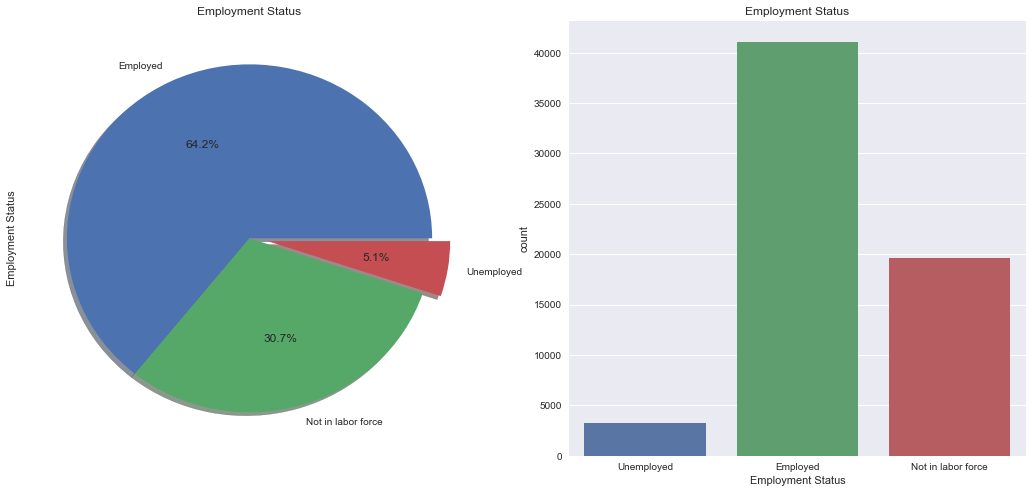

In [8]:
# Distribution of Employment Status
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Employment Status'].value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Employment Status')
sns.countplot('Employment Status', data=df_train, ax=ax[1])
ax[1].set_title('Employment Status')
plt.show()

Looks like the majority of people are/were employed according to this data. The account for 64.2% of the sample size, which is quite high given 3 classes. 30.7% of people are/were 'Not in labor force', while only 5.1% of the entire population(sample) were unemployed.  
  
Well, that gives a good overview of the overall distribution of our target variable. But, how each of the other features affect this target variable. We'll need to dive deep into the data for that. Let's proceed.

## Feature - Analysis

### Education Level : Categorical Variable

In [9]:
# Distribution of Employment Status across Education Level
df_train.groupby(['Education Level', 'Employment Status'])['Employment Status'].count()

Education Level   Employment Status 
10th grade        Employed                828
                  Not in labor force     1273
                  Unemployed              289
11th grade        Employed               1061
                  Not in labor force     1071
                  Unemployed              308
12th grade        Employed                397
                  Not in labor force      296
                  Unemployed               63
9th grade         Employed                687
                  Not in labor force     1155
                  Unemployed              238
Associate Degree  Employed               4429
                  Not in labor force     1410
                  Unemployed              241
Bachelor          Employed               9930
                  Not in labor force     2752
                  Unemployed              360
Doctoral Degree   Employed                797
                  Not in labor force      170
                  Unemployed               

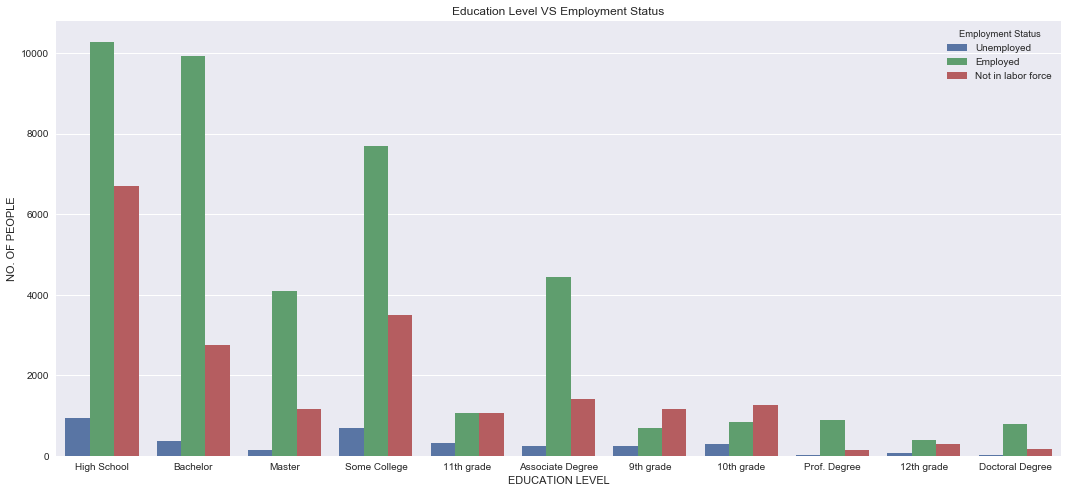

In [10]:
f, ax = plt.subplots(1, 1, figsize=(18,8))
sns.countplot('Education Level', hue='Employment Status', data=df_train, ax=ax)
ax.set_title('Education Level VS Employment Status')
ax.set_ylabel('NO. OF PEOPLE')
ax.set_xlabel('EDUCATION LEVEL')
plt.show()

### Gender

In [11]:
# Distribution of Gender across Employement Status
df_train.groupby(['Gender', 'Employment Status'])['Employment Status'].count() 

Gender  Employment Status 
Female  Employed              21206
        Not in labor force    13194
        Unemployed             1732
Male    Employed              19892
        Not in labor force     6436
        Unemployed             1546
Name: Employment Status, dtype: int64

In [12]:
# Male-to-Female ratio in the data
df_train['Gender'].value_counts()/len(df_train)*100

Female    56.450958
Male      43.549042
Name: Gender, dtype: float64

As far as the data is concerned, the gender looks to be quite evenly distributed, as in the Male Percentage and Female Percentage are nearly equal. No one particular gender has majority of samples

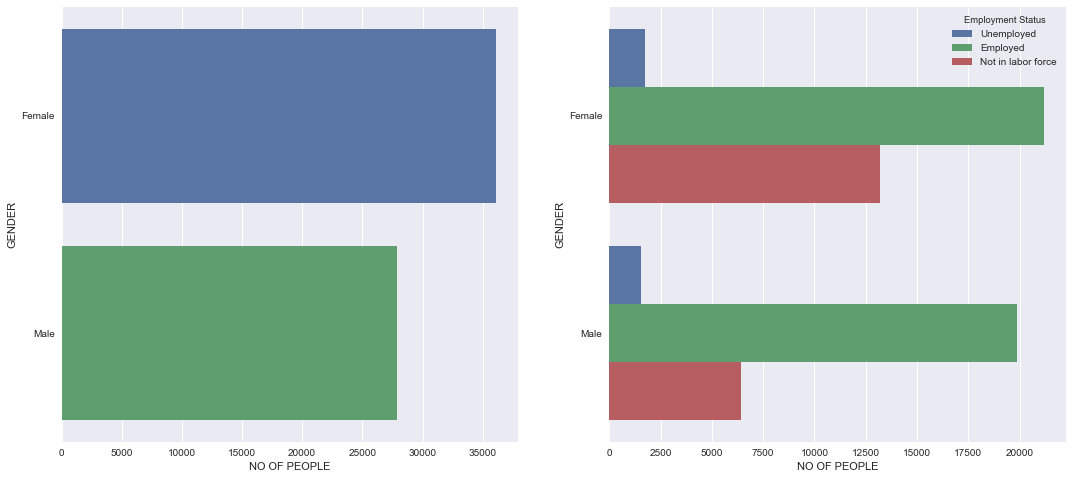

In [13]:
# Visualization for same
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(y='Gender', data=df_train, ax=ax[0])
ax[0].set_ylabel('GENDER')
ax[0].set_xlabel('NO OF PEOPLE')
sns.countplot(y='Gender', hue='Employment Status', data=df_train, ax=ax[1])
ax[1].set_ylabel('GENDER')
ax[1].set_xlabel('NO OF PEOPLE')
plt.show()

Distribution looks kind of even across both the GENDERs as far as EMPLOYMENT STATUS is concerned. For both the genders (Male and Female), number of people that are 'EMPLOYED' is highest compared to other classes. There is a common trend for both the genders. For both the genders,  
**No of people (EMPLOYED) > No of people (NOT IN LABOR FORCE) > No of people (UNEMPLOYED)**

### Year : Categorical

In [14]:
# Year distribution across Employment Status
df_train['Year'].value_counts().sort_values()

2005    7999
2012    8001
2011    8001
2010    8001
2009    8001
2008    8001
2007    8001
2006    8001
Name: Year, dtype: int64

For each year we have almost equal number of samples  

#### Year VS Employment Status

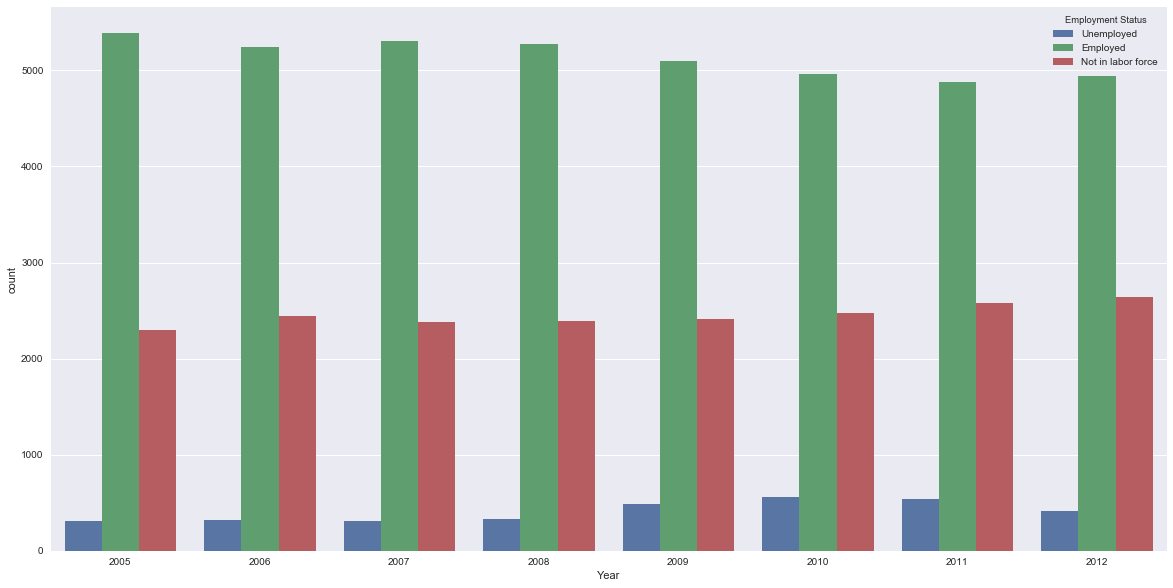

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
sns.countplot(x='Year', hue='Employment Status', data=df_train, ax=ax)
plt.show()

Number of **UNEMPLOYED** people have increased over the years on average.

Number of **EMPLOYED** people have decreased over the years on average.

Number of people **NOT IN LABOR FORCE** have increased over the years on average.  

### Age Range : Categorical

In [16]:
# Age Range distribution across Employment Status
df_train['Age Range'].value_counts()

40-49    13348
30-39    12940
50-59    10836
60-69     7799
20-29     7706
70-79     4719
0-19      3973
80+       2685
Name: Age Range, dtype: int64

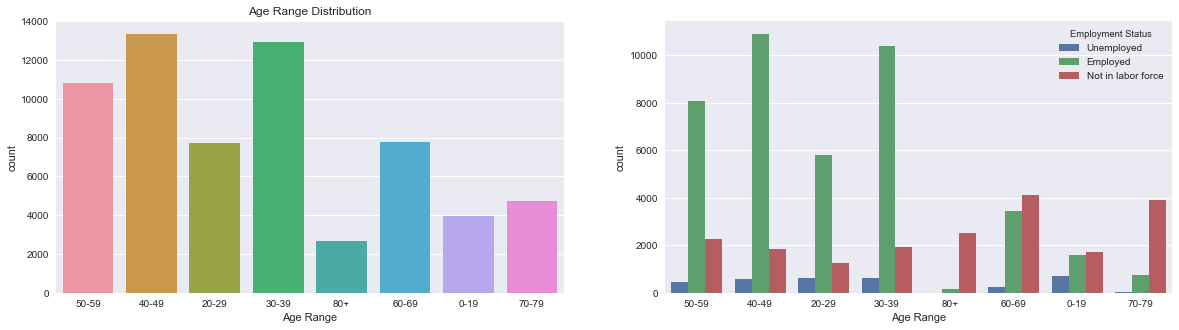

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot('Age Range', data=df_train, ax=ax[0])
ax[0].set_title('Age Range Distribution')
sns.countplot('Age Range', hue='Employment Status', data=df_train, ax=ax[1])
plt.show()

Looks interesting. Investigate into it TEAM!

### Children : Categorical

In [18]:
# Children distribution
df_train['Children'].value_counts().sort_values(ascending=False)

0     33571
1     12552
2     11680
3      4409
4      1304
5       332
6       108
7        29
8        14
9         3
10        2
11        1
12        1
Name: Children, dtype: int64

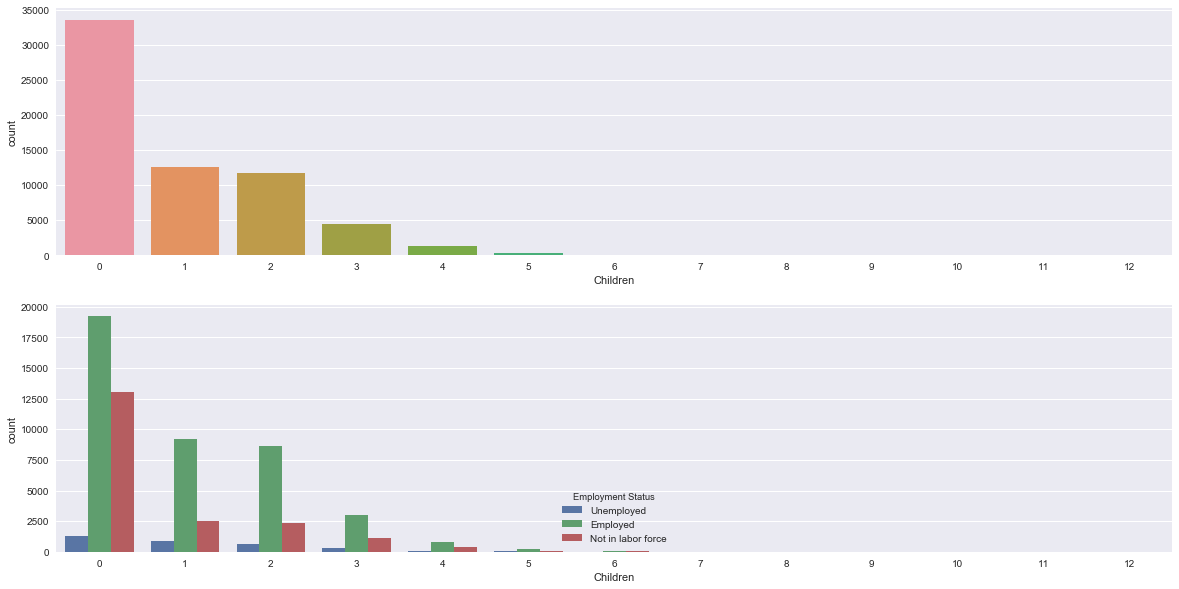

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot('Children', data=df_train, ax=ax[0])
sns.countplot('Children', hue='Employment Status', data=df_train, ax=ax[1])
plt.show()

Team, Interpret!

### Weekly Earnings : Continuous Variable

In [20]:
print('Maximum Weekle Earning is : ', df_train['Weekly Earnings'].max())
print('Minimum Weekle Earning is : ', df_train['Weekly Earnings'].min())
print('Average Weekle Earning is : ', df_train['Weekly Earnings'].mean())

Maximum Weekle Earning is :  2885
Minimum Weekle Earning is :  0
Average Weekle Earning is :  485.69787207449303


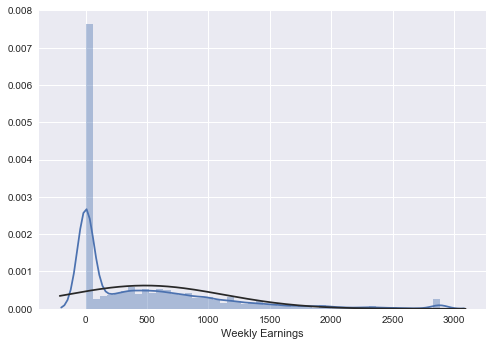

In [21]:
sns.distplot(df_train['Weekly Earnings'], fit=norm)
plt.show()

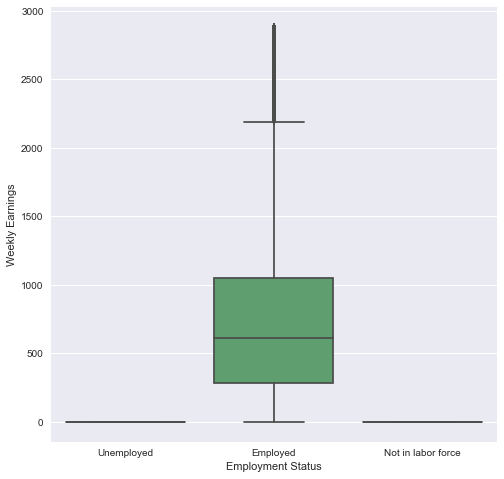

In [22]:
var = 'Weekly Earnings'
data = pd.concat([df_train['Weekly Earnings'], df_train['Employment Status']], axis=1)
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(y=var, x='Employment Status', data=data, ax=ax)
plt.show()

## Question 1
Summary of time spending pattern in 2014 (like time spend per activity e.g. Socializing, eating, working, etc.)

In [23]:
df_q1 = df_train[df_train['Year']==2012]
df_q1.head()

Id Education Level  Age Age Range Employment Status  Gender  \
56005  56006     High School   38     30-39        Unemployed  Female   
56006  56007      10th grade   17      0-19        Unemployed  Female   
56007  56008    Some College   20     20-29          Employed  Female   
56008  56009       9th grade   58     50-59          Employed    Male   
56009  56010       9th grade   65     60-69          Employed  Female   

       Children  Weekly Earnings  Year  Weekly Hours Worked    ...      \
56005         2                0  2012                    0    ...       
56006         4                0  2012                    0    ...       
56007         1              308  2012                    0    ...       
56008         0                0  2012                   40    ...       
56009         0              200  2012                   16    ...       

       Playing with Children  Job Searching  Shopping  Eating and Drinking  \
56005                      0              0         5                   60   
56006                     90              0         0                   60   
56007                      0              0         0                   55   
56008                      0              0        10                  160   
56009                      0              0       120                   40   

       Socializing & Relaxing  Television  Golfing  Running  Volunteering  \
56005                     528         528        0        0             0   
56006                     120         120        0        0             0   
56007                      13          13        0        0             0   
56008                     588         474        0        0             0   
56009                     415           0        0        0             0   

           Total  
56005  32.516667  
56006  21.250000  
56007   7.683333  
56008  30.900000  
56009  13.000000  

[5 rows x 25 columns]

In [24]:
print('Total number of samples for year 2012:', len(df_q1))

Total number of samples for year 2012: 8001


In [25]:
df_q1.loc[:,'Sleeping':'Volunteering'].describe()

Sleeping     Grooming    Housework  Food & Drink Prep  \
count  8001.000000  8001.000000  8001.000000        8001.000000   
mean    529.529059    40.398450    41.434196          33.162480   
std     136.842247    37.537744    85.607682          51.083381   
min       0.000000     0.000000     0.000000           0.000000   
25%     450.000000    10.000000     0.000000           0.000000   
50%     520.000000    30.000000     0.000000          10.000000   
75%     600.000000    60.000000    50.000000          50.000000   
max    1410.000000   495.000000  1405.000000         627.000000   

       Caring for Children  Playing with Children  Job Searching     Shopping  \
count          8001.000000            8001.000000    8001.000000  8001.000000   
mean             27.573053               8.819523       2.126734    22.671791   
std              73.774655              39.815637      24.880026    46.581834   
min               0.000000               0.000000       0.000000     0.000000   
25%               0.000000               0.000000       0.000000     0.000000   
50%               0.000000               0.000000       0.000000     0.000000   
75%               0.000000               0.000000       0.000000    25.000000   
max             950.000000             840.000000     750.000000   520.000000   

       Eating and Drinking  Socializing & Relaxing   Television      Golfing  \
count          8001.000000             8001.000000  8001.000000  8001.000000   
mean             69.342582              298.217223   173.290089     1.494813   
std              54.127234              210.976769   176.253953    19.688588   
min               0.000000                0.000000     0.000000     0.000000   
25%              30.000000              134.000000    30.000000     0.000000   
50%              60.000000              260.000000   120.000000     0.000000   
75%              90.000000              428.000000   252.000000     0.000000   
max             718.000000             1350.000000  1255.000000   400.000000   

           Running  Volunteering  
count  8001.000000   8001.000000  
mean      0.813398      9.238720  
std       8.449027     45.978832  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max     330.000000    795.000000

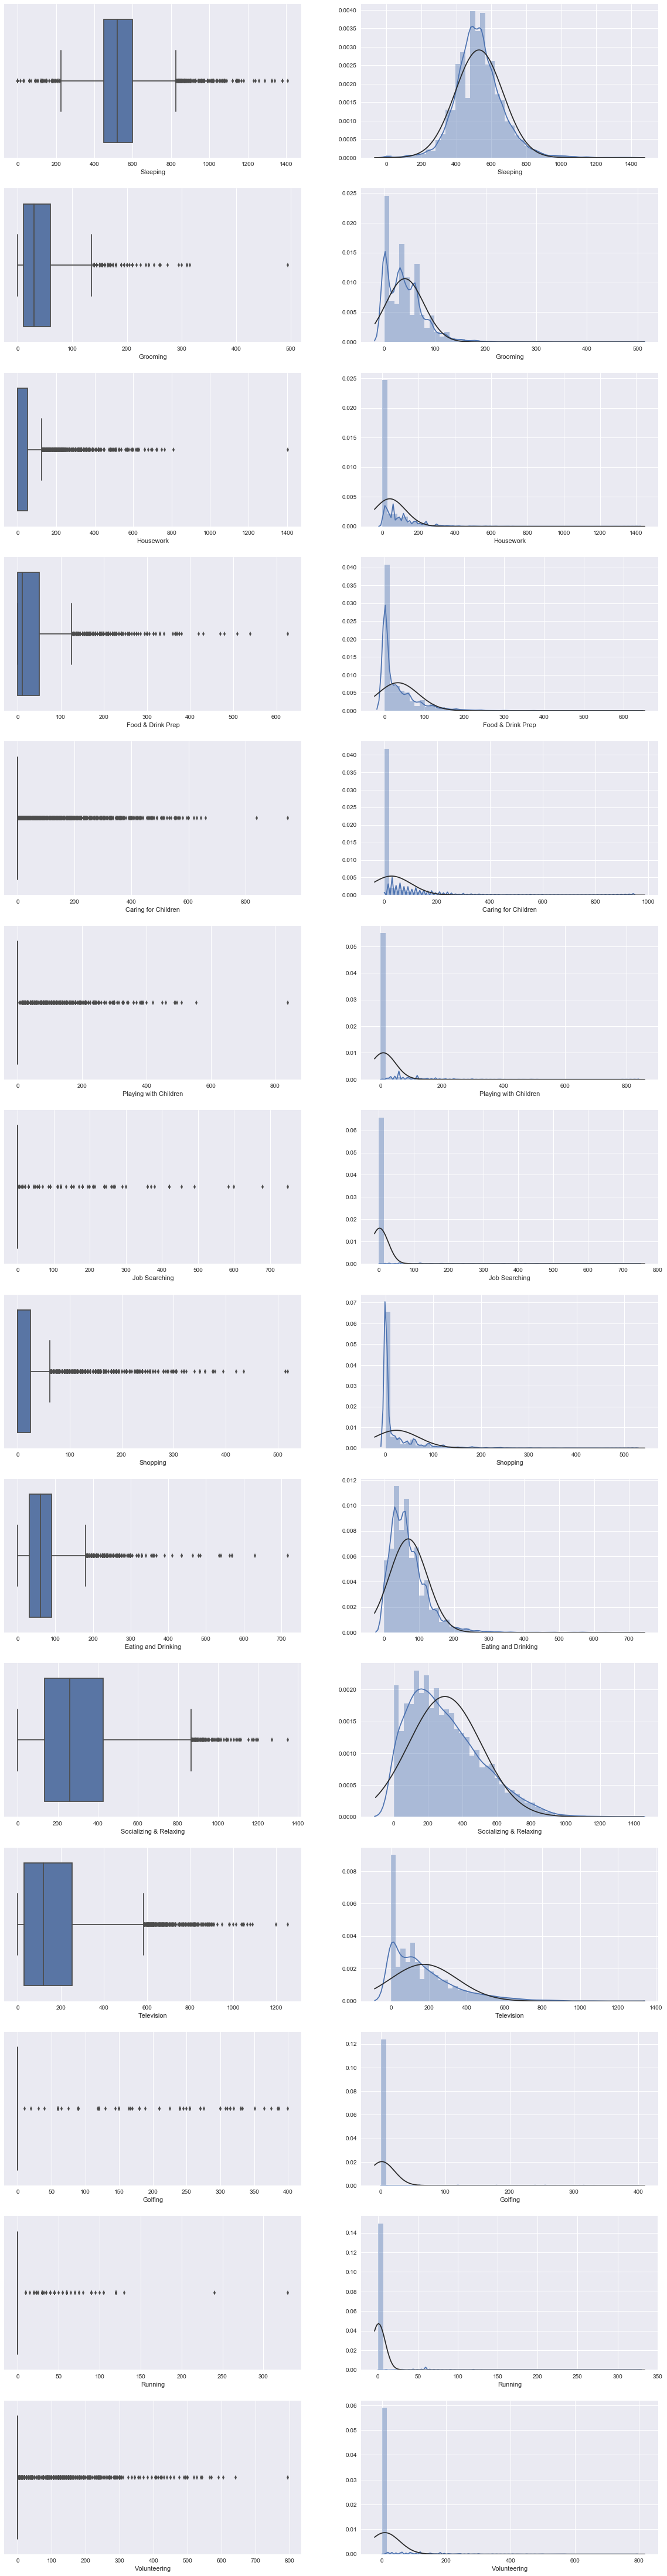

In [26]:
f, ax = plt.subplots(14, 2, figsize=(20, 80))

activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(activity, data=df_q1, ax=ax[i, 0])
    sns.distplot(df_q1[activity], fit=norm, ax=ax[i, 1])
    i+=1
plt.show()

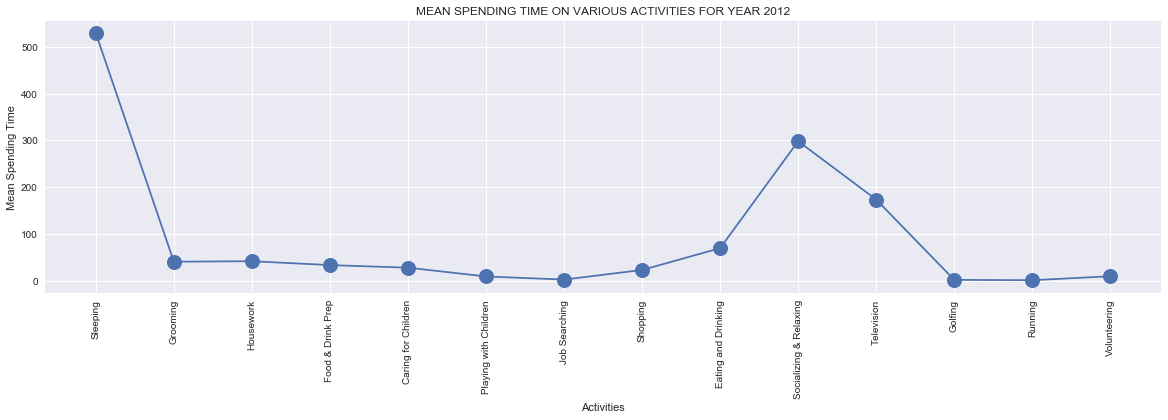

In [42]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
activity_means = []
for activity in activities:
    activity_means.append(df_q1[activity].mean())

fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(activity_means))
series1 = np.array(activity_means).astype(np.double)
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(xs, activities, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.show()

## Question 2
How does the spending time in question 1 changes based on age, working status, education level etc.?

### a) Change in SPENDING TIME based on AGE

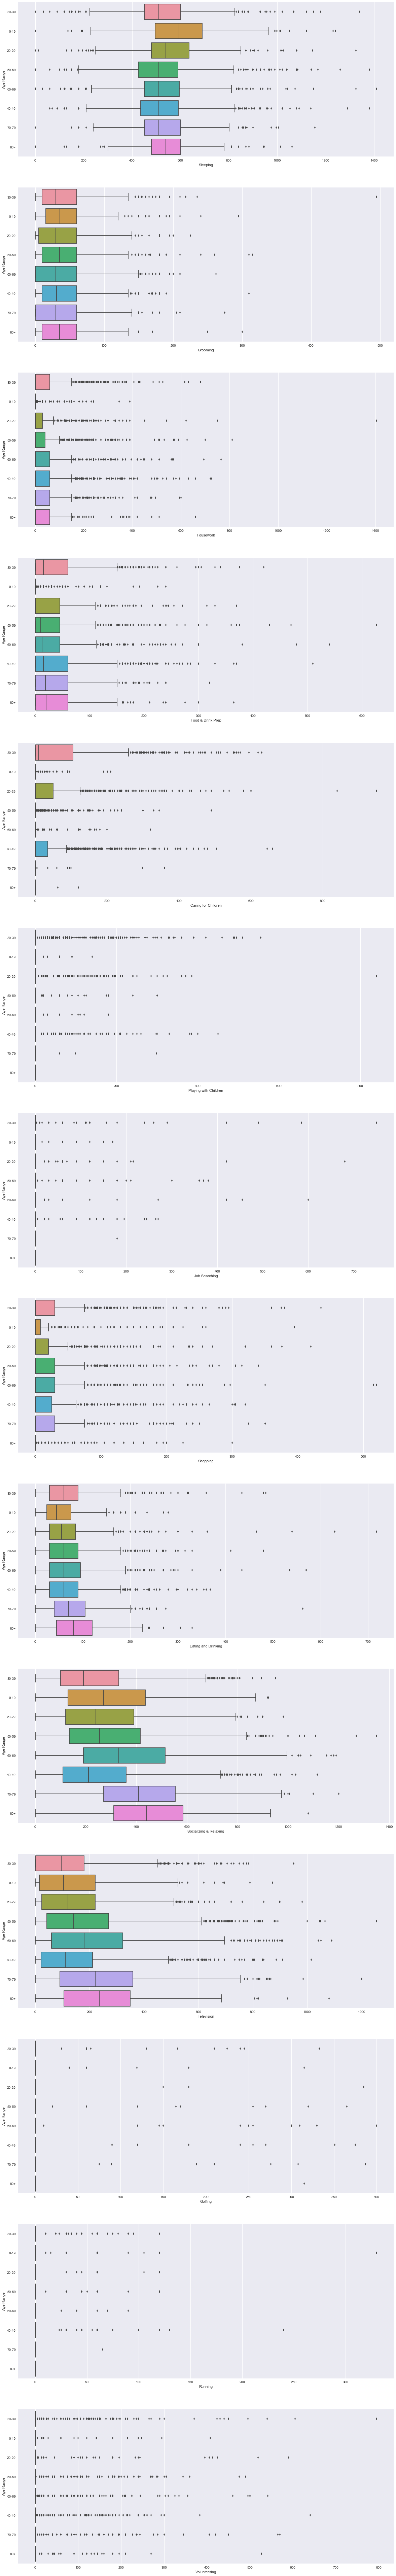

In [43]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Age Range', x=activity, data=df_q1, ax=ax[i])
    i+=1
plt.show()

In [56]:
age_groups = df_q.groupby(by='Age Range').mean().loc[:,'Sleeping':'Volunteering']
age_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Age Range                                                        
0-19       596.918182  45.161364  17.163636          10.388636   
20-29      556.167401  40.690529  33.202643          28.622247   
30-39      525.065499  37.642023  44.289235          36.479248   
40-49      518.629053  39.721790  46.309339          37.527237   
50-59      515.717498  41.329585  39.619817          30.661279   
60-69      517.517762  40.894316  44.854352          33.364121   
70-79      526.465046  40.755319  44.802432          37.598784   
80+        543.469613  42.649171  49.024862          40.651934   

           Caring for Children  Playing with Children  Job Searching  \
Age Range                                                              
0-19                  4.584091               1.727273       1.443182   
20-29                47.099119              16.971366       3.436123   
30-39                68.506485              23.841115       2.996757   
40-49                36.481193               9.255512       1.802853   
50-59                 7.153197               1.537597       2.463106   
60-69                 2.246892               0.634991       1.931616   
70-79                 1.589666               0.694529       0.273556   
80+                   0.505525               0.000000       0.000000   

            Shopping  Eating and Drinking  Socializing & Relaxing  Television  \
Age Range                                                                       
0-19       17.870455            56.131818              300.790909  143.545455   
20-29      22.400881            63.144273              265.770925  147.031938   
30-39      25.623217            70.424125              230.236057  127.201686   
40-49      22.157588            68.630350              251.707523  145.813878   
50-59      22.430077            65.033732              295.594519  185.596627   
60-69      22.964476            73.531972              362.398757  224.176732   
70-79      24.822188            79.094225              422.264438  246.834347   
80+        14.936464            85.555249              449.361878  248.328729   

            Golfing   Running  Volunteering  
Age Range                                    
0-19       1.622727  2.613636      5.634091  
20-29      0.787445  0.704846      6.189427  
30-39      1.184176  1.053826     10.160182  
40-49      1.278210  1.185473      8.359274  
50-59      1.226283  0.643008      8.933240  
60-69      2.788632  0.253108     10.966252  
70-79      2.331307  0.098784     13.747720  
80+        0.870166  0.000000      8.720994

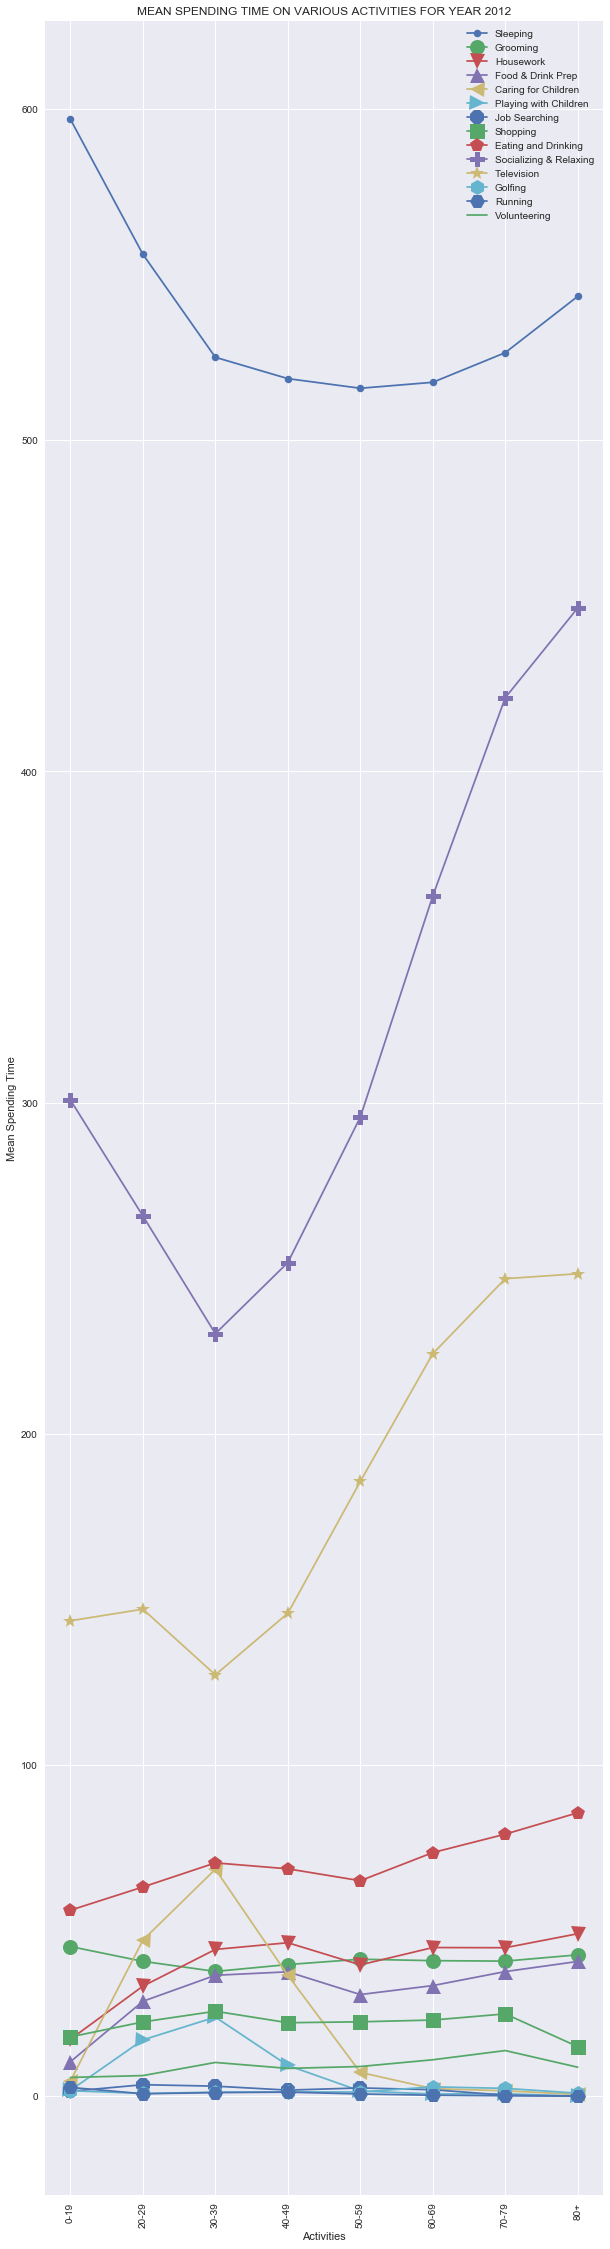

In [139]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,40))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(age_groups['Sleeping']))

for activity in activities:
    series1 = age_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, age_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

### b) Change in SPENDING TIME based on EMPLOYMENT STATUS

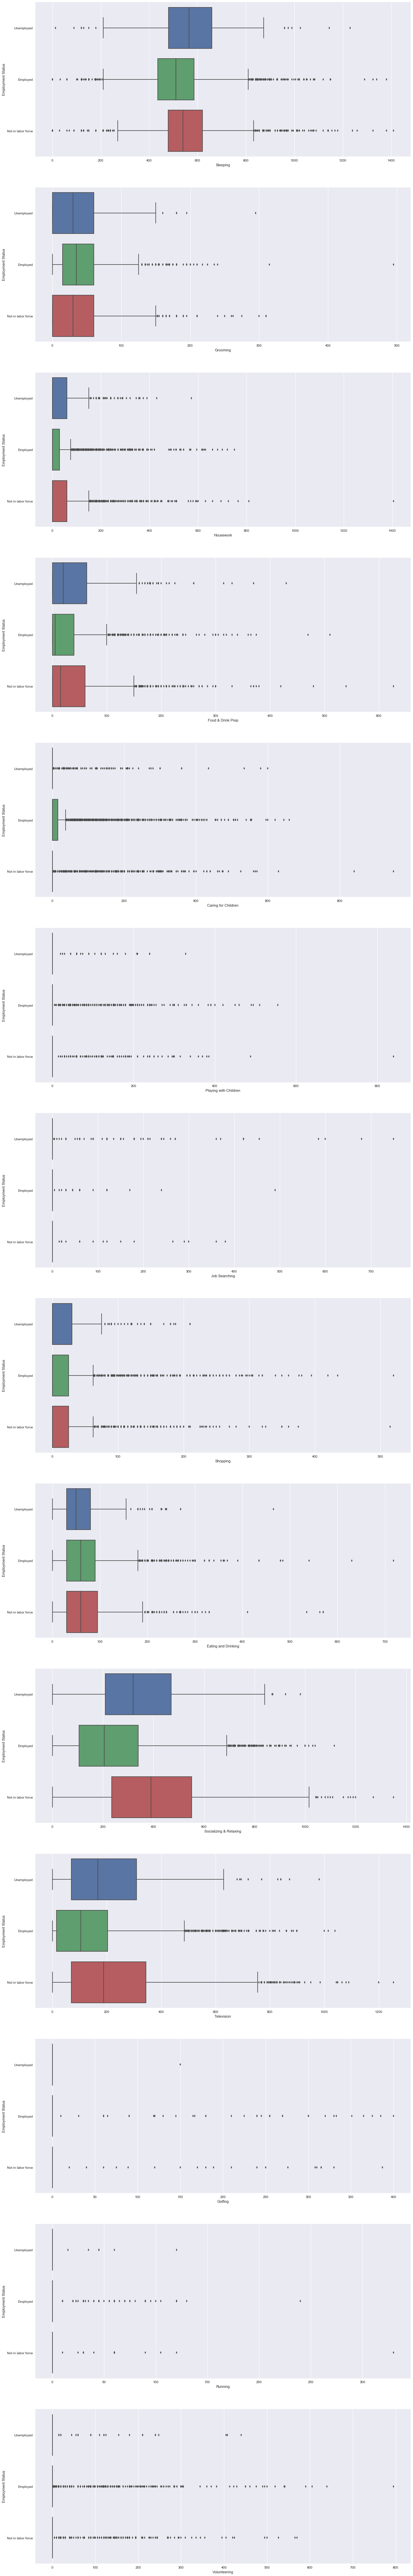

In [131]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Employment Status', x=activity, data=df_q1, ax=ax[i])
    i+=1
plt.show()

In [132]:
employment_groups = df_q1.groupby(by='Employment Status').mean().loc[:,'Sleeping':'Volunteering']
employment_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Employment Status                                                         
Employed            515.030144  41.802954  35.399150          27.855351   
Not in labor force  550.429761  38.350625  51.550170          41.273381   
Unemployed          569.023981  36.719424  48.904077          44.702638   

                    Caring for Children  Playing with Children  Job Searching  \
Employment Status                                                               
Employed                      30.079304               9.668015       0.435970   
Not in labor force            22.721696               7.358955       0.928436   
Unemployed                    28.589928               8.011990      29.757794   

                     Shopping  Eating and Drinking  Socializing & Relaxing  \
Employment Status                                                            
Employed            23.183290            68.703621              240.305685   
Not in labor force  21.862552            71.604317              399.457402   
Unemployed          21.733813            62.592326              343.496403   

                    Television   Golfing   Running  Volunteering  
Employment Status                                                 
Employed            137.281813  1.573134  0.978758      8.702205  
Not in labor force  234.957970  1.527452  0.511170     10.307838  
Unemployed          209.558753  0.359712  0.767386      8.827338

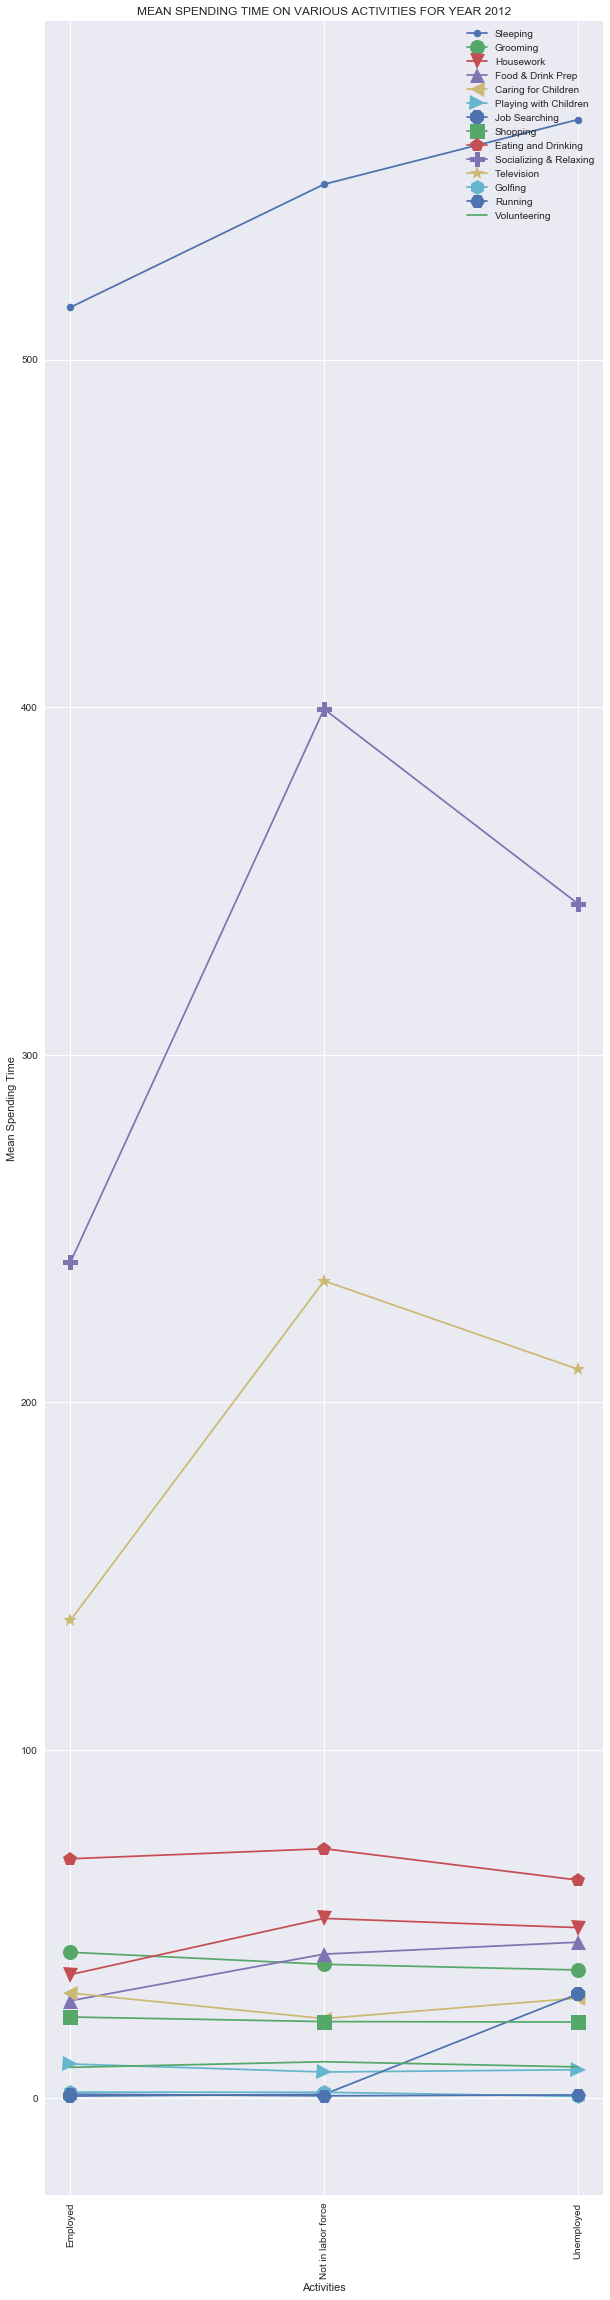

In [141]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,40))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(employment_groups['Sleeping']))

for activity in activities:
    series1 = employment_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, employment_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

### c) Change in SPENDING TIME based on EDUCATION LEVEL

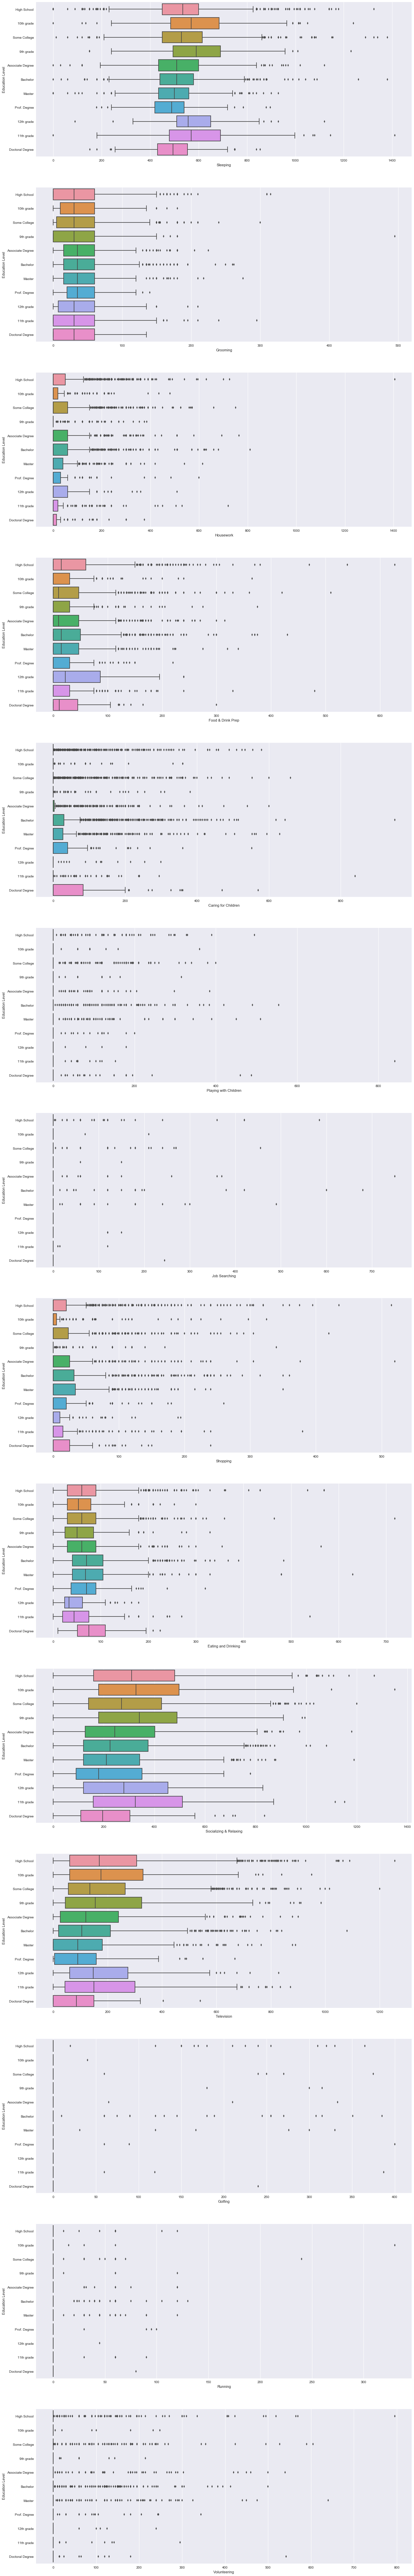

In [142]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Education Level', x=activity, data=df_q1, ax=ax[i])
    i+=1
plt.show()

In [144]:
education_groups = df_q1.groupby(by='Education Level').mean().loc[:,'Sleeping':'Volunteering']
education_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Education Level                                                         
10th grade        588.700389  39.564202  30.649805          22.210117   
11th grade        582.528571  41.632143  35.825000          26.700000   
12th grade        577.804348  40.260870  47.771739          45.543478   
9th grade         593.489083  38.065502  28.820961          25.921397   
Associate Degree  516.848329  42.888175  48.104113          33.834190   
Bachelor          511.830878  41.411314  41.978786          34.265174   
Doctoral Degree   496.729508  34.737705  26.270492          28.754098   
High School       534.011215  39.012150  42.765421          36.573832   
Master            500.035762  40.903311  34.797351          32.419868   
Prof. Degree      490.457746  41.070423  34.795775          22.598592   
Some College      538.137177  40.359178  45.071571          31.868787   

                  Caring for Children  Playing with Children  Job Searching  \
Education Level                                                               
10th grade                  10.073930               4.474708       1.089494   
11th grade                  16.707143               6.628571       0.517857   
12th grade                  18.434783               4.456522       4.239130   
9th grade                   17.414847               5.262009       0.917031   
Associate Degree            27.285347               6.664524       3.065553   
Bachelor                    39.856806              12.195639       2.186211   
Doctoral Degree             58.131148              25.401639       2.008197   
High School                 18.578972               5.560280       1.827570   
Master                      38.460927              13.042384       2.788079   
Prof. Degree                33.507042              10.422535       0.000000   
Some College                25.280981               9.104042       2.408880   

                   Shopping  Eating and Drinking  Socializing & Relaxing  \
Education Level                                                            
10th grade        16.610895            59.957198              357.054475   
11th grade        19.864286            55.353571              350.635714   
12th grade        15.880435            48.423913              307.260870   
9th grade         11.825328            61.379913              353.746725   
Associate Degree  22.744216            66.876607              282.683805   
Bachelor          27.146730            78.137890              260.127283   
Doctoral Degree   21.122951            83.721311              233.040984   
High School       22.300467            66.294393              337.210748   
Master            25.092715            78.744371              244.790728   
Prof. Degree      21.359155            72.711268              230.056338   
Some College      20.779324            65.540093              303.451292   

                  Television   Golfing   Running  Volunteering  
Education Level                                                 
10th grade        211.155642  0.155642  1.692607      3.408560  
11th grade        207.392857  2.021429  1.071429      3.067857  
12th grade        190.445652  0.000000  0.489130      6.902174  
9th grade         209.375546  3.471616  1.091703      3.126638  
Associate Degree  160.742931  0.781491  0.728792     11.508997  
Bachelor          139.198586  2.081909  1.176193     10.113141  
Doctoral Degree    93.483607  1.967213  0.655738     10.295082  
High School       213.285514  1.500000  0.310748      7.247196  
Master            118.364238  1.621192  1.470199     15.333775  
Prof. Degree      112.380282  3.866197  2.218310     14.443662  
Some College      181.744201  0.791915  0.493704      9.492379

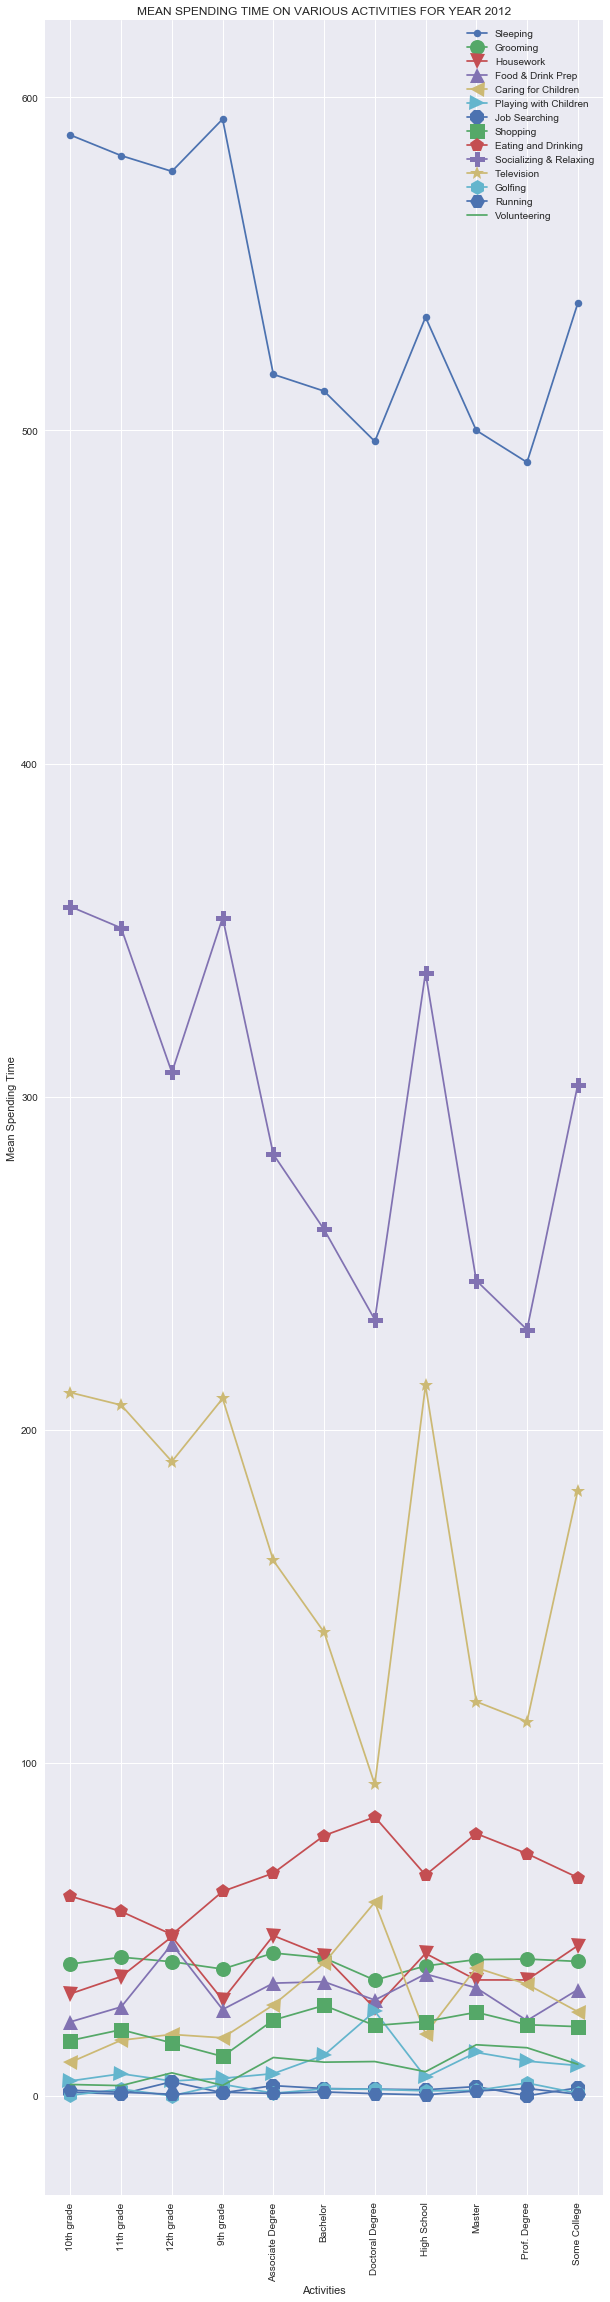

In [145]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,40))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(education_groups['Sleeping']))

for activity in activities:
    series1 = education_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, education_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

### d) Change in SPENDING TIME based on GENDER

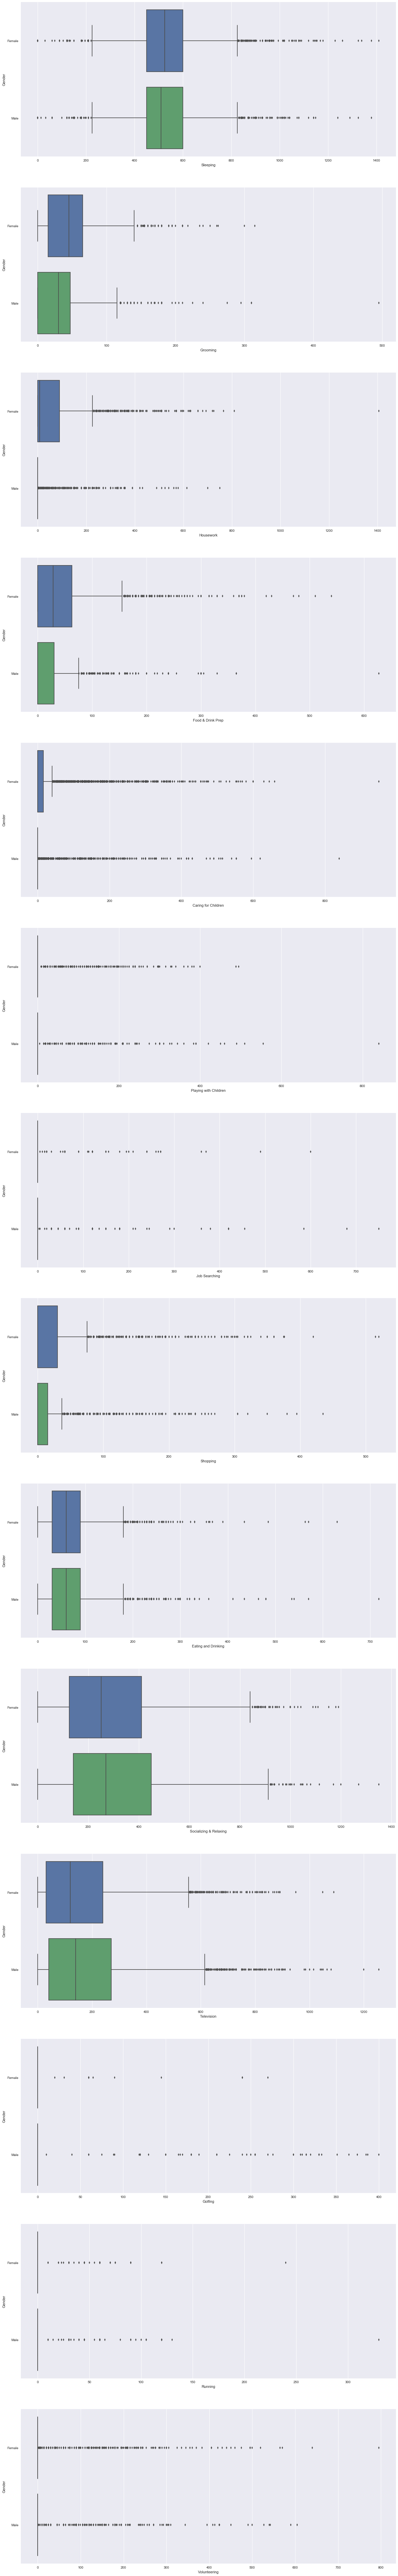

In [146]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Gender', x=activity, data=df_q1, ax=ax[i])
    i+=1
plt.show()

In [147]:
gender_groups = df_q1.groupby(by='Gender').mean().loc[:,'Sleeping':'Volunteering']
gender_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Gender                                                        
Female  533.586814  47.015353  59.507564          43.813953   
Male    524.497760  32.194009  19.024636          19.955487   

        Caring for Children  Playing with Children  Job Searching   Shopping  \
Gender                                                                         
Female            33.596974               8.830662       1.455859  26.671258   
Male              20.103863               8.805711       2.958567  17.712766   

        Eating and Drinking  Socializing & Relaxing  Television   Golfing  \
Gender                                                                      
Female            67.228042              286.818921  160.645067  0.289230   
Male              71.964446              312.350224  188.968925  2.989642   

         Running  Volunteering  
Gender                          
Female  0.620456     10.288779  
Male    1.052632      7.936730

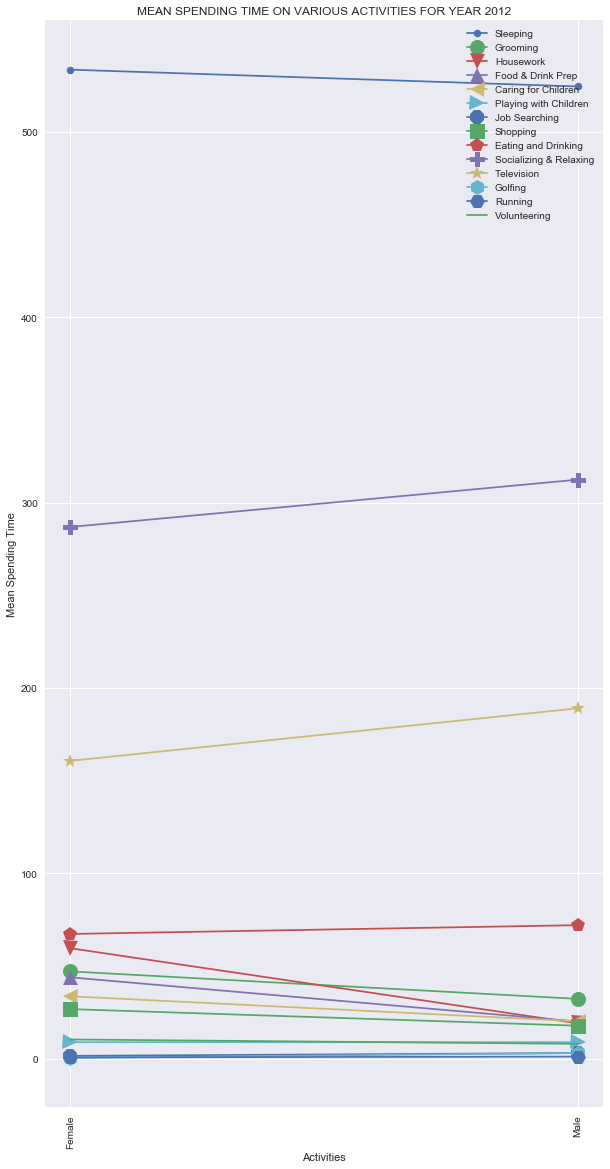

In [150]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,20))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(gender_groups['Sleeping']))

for activity in activities:
    series1 = gender_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, gender_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

### e) Change in SPENDING TIME based on number of CHILDREN

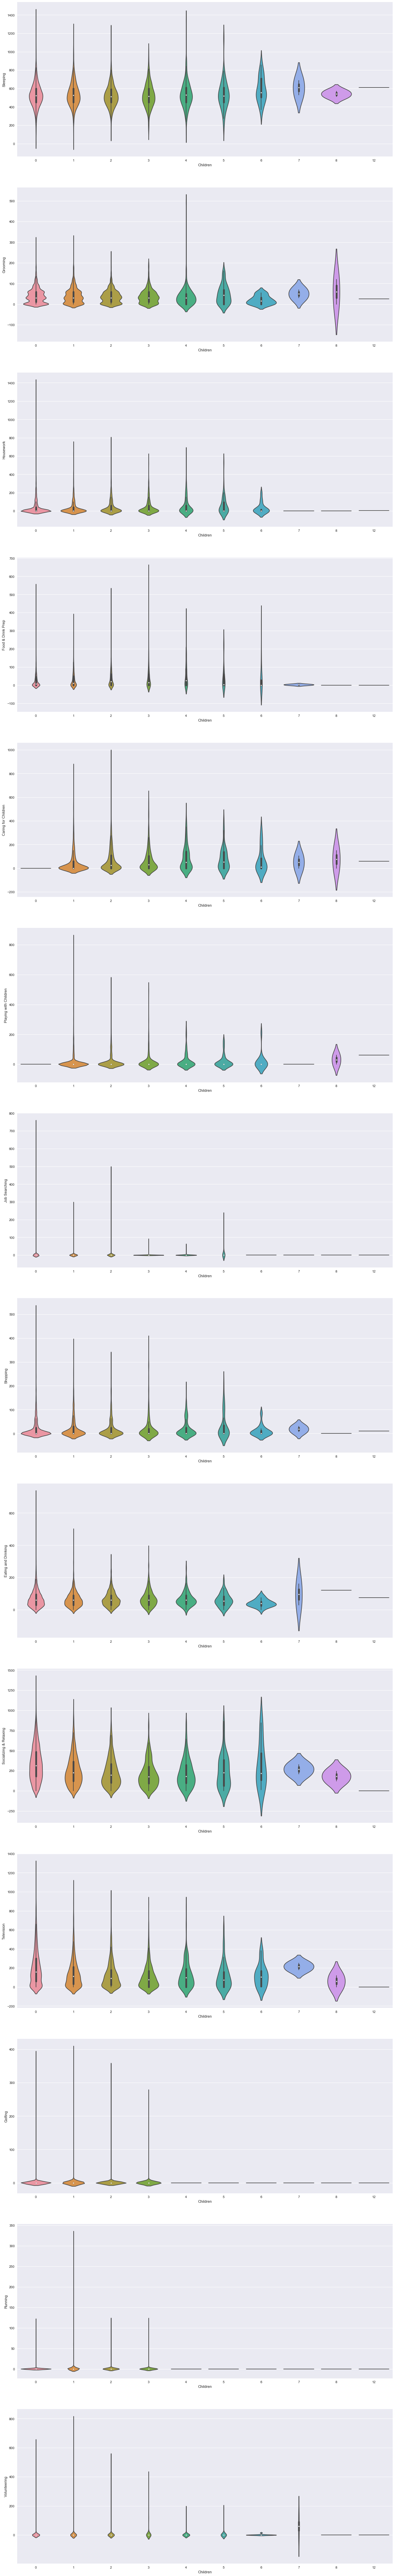

In [151]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
#     sns.boxplot(y='Children', x=activity, data=df_2012, ax=ax[i])
    sns.violinplot(x="Children", y=activity, data=df_q1, ax=ax[i])
    i+=1
plt.show()

In [152]:
children_groups = df_q1.groupby(by='Children').mean().loc[:,'Sleeping':'Volunteering']
children_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Children                                                        
0         528.765520  41.158776  39.447745          29.140688   
1         538.002778  40.997917  38.252083          33.546528   
2         522.477471  38.446221  49.141715          40.039244   
3         526.955466  37.967611  42.609312          42.358300   
4         534.684564  37.308725  53.523490          52.416107   
5         535.613636  47.954545  61.068182          45.454545   
6         589.200000  20.666667  30.000000          46.666667   
7         609.000000  50.000000   0.000000           2.500000   
8         540.000000  60.000000   0.000000           0.000000   
12        610.000000  25.000000   5.000000           0.000000   

          Caring for Children  Playing with Children  Job Searching  \
Children                                                              
0                    0.000000               0.000000       2.514739   
1                   46.997917              16.786806       2.246528   
2                   72.391715              22.538517       1.529797   
3                   71.042510              21.186235       0.212551   
4                   90.114094              24.919463       0.469799   
5                   79.545455              18.750000       5.454545   
6                   65.933333              17.000000       0.000000   
7                   51.500000               0.000000       0.000000   
8                   75.000000              30.000000       0.000000   
12                  60.000000              60.000000       0.000000   

           Shopping  Eating and Drinking  Socializing & Relaxing  Television  \
Children                                                                       
0         21.900625            71.369361              343.174185  204.538633   
1         24.329861            65.177083              258.969444  145.513194   
2         23.411337            67.640988              234.938953  130.005087   
3         22.892713            70.056680              210.805668  111.702429   
4         21.449664            66.577181              219.449664  130.577181   
5         30.818182            60.090909              240.545455  115.568182   
6         11.266667            40.800000              319.666667  124.800000   
7         18.500000            95.000000              267.500000  215.000000   
8          0.000000           120.000000              180.000000   60.000000   
12        10.000000            75.000000                0.000000    0.000000   

           Golfing   Running  Volunteering  
Children                                    
0         1.630415  0.602054      9.460473  
1         1.861111  1.166667      7.950000  
2         1.034884  1.356831      9.045058  
3         1.123482  0.536437     13.153846  
4         0.000000  0.000000      5.691275  
5         0.000000  0.000000      4.090909  
6         0.000000  0.000000      1.000000  
7         0.000000  0.000000     60.000000  
8         0.000000  0.000000      0.000000  
12        0.000000  0.000000      0.000000

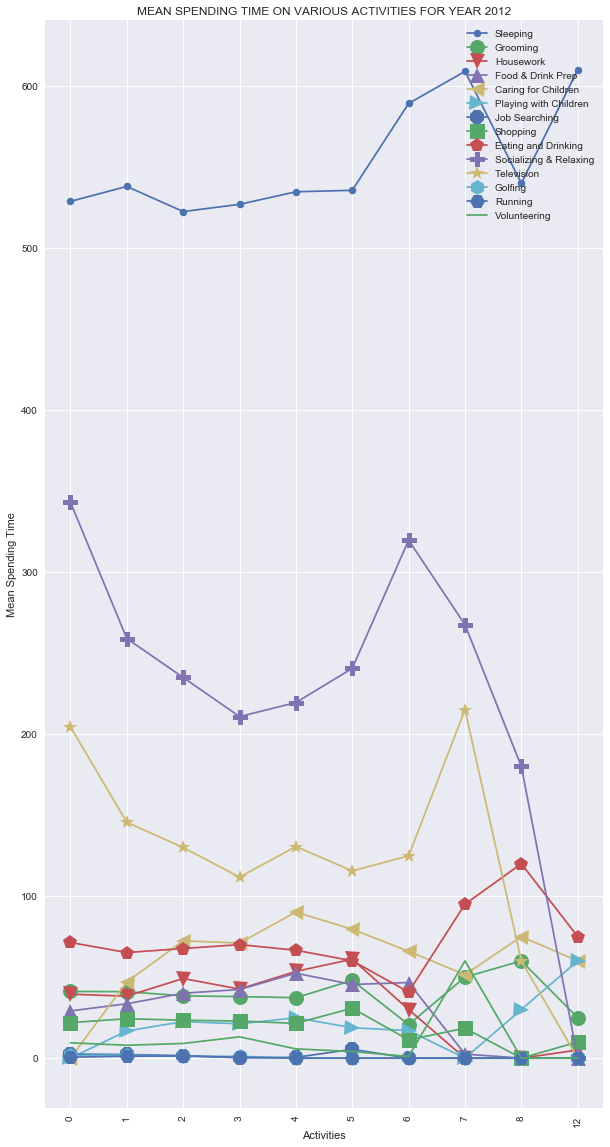

In [155]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,20))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(children_groups['Sleeping']))

for activity in activities:
    series1 = children_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, children_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

### f) Change in SPENDING TIME based on AGE

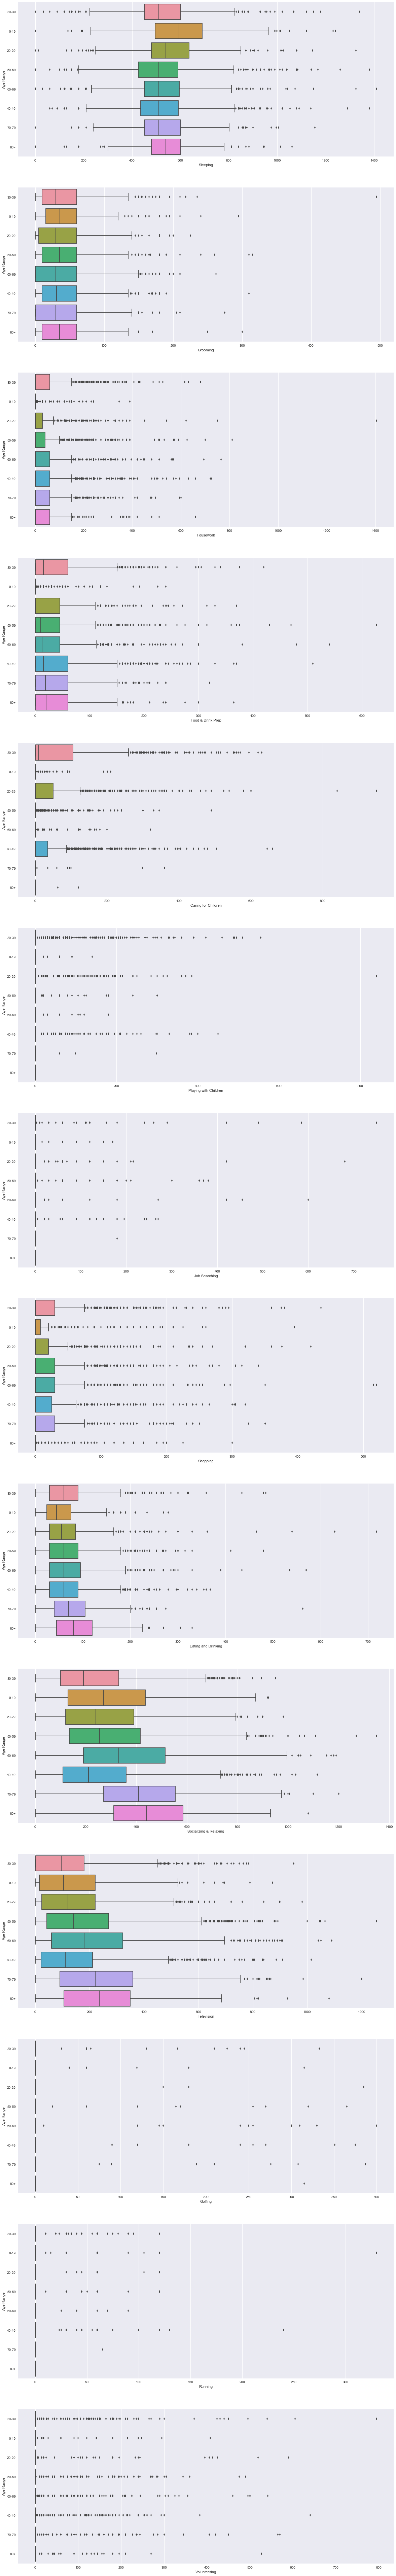

In [156]:
f, ax = plt.subplots(14, 1, figsize=(20, 140))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Age Range', x=activity, data=df_q1, ax=ax[i])
#     sns.violinplot(x="Children", y=activity, data=df_2012, ax=ax[i])
    i+=1
plt.show()

In [157]:
age_groups = df_q1.groupby(by='Age Range').mean().loc[:,'Sleeping':'Volunteering']
age_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Age Range                                                        
0-19       596.918182  45.161364  17.163636          10.388636   
20-29      556.167401  40.690529  33.202643          28.622247   
30-39      525.065499  37.642023  44.289235          36.479248   
40-49      518.629053  39.721790  46.309339          37.527237   
50-59      515.717498  41.329585  39.619817          30.661279   
60-69      517.517762  40.894316  44.854352          33.364121   
70-79      526.465046  40.755319  44.802432          37.598784   
80+        543.469613  42.649171  49.024862          40.651934   

           Caring for Children  Playing with Children  Job Searching  \
Age Range                                                              
0-19                  4.584091               1.727273       1.443182   
20-29                47.099119              16.971366       3.436123   
30-39                68.506485              23.841115       2.996757   
40-49                36.481193               9.255512       1.802853   
50-59                 7.153197               1.537597       2.463106   
60-69                 2.246892               0.634991       1.931616   
70-79                 1.589666               0.694529       0.273556   
80+                   0.505525               0.000000       0.000000   

            Shopping  Eating and Drinking  Socializing & Relaxing  Television  \
Age Range                                                                       
0-19       17.870455            56.131818              300.790909  143.545455   
20-29      22.400881            63.144273              265.770925  147.031938   
30-39      25.623217            70.424125              230.236057  127.201686   
40-49      22.157588            68.630350              251.707523  145.813878   
50-59      22.430077            65.033732              295.594519  185.596627   
60-69      22.964476            73.531972              362.398757  224.176732   
70-79      24.822188            79.094225              422.264438  246.834347   
80+        14.936464            85.555249              449.361878  248.328729   

            Golfing   Running  Volunteering  
Age Range                                    
0-19       1.622727  2.613636      5.634091  
20-29      0.787445  0.704846      6.189427  
30-39      1.184176  1.053826     10.160182  
40-49      1.278210  1.185473      8.359274  
50-59      1.226283  0.643008      8.933240  
60-69      2.788632  0.253108     10.966252  
70-79      2.331307  0.098784     13.747720  
80+        0.870166  0.000000      8.720994

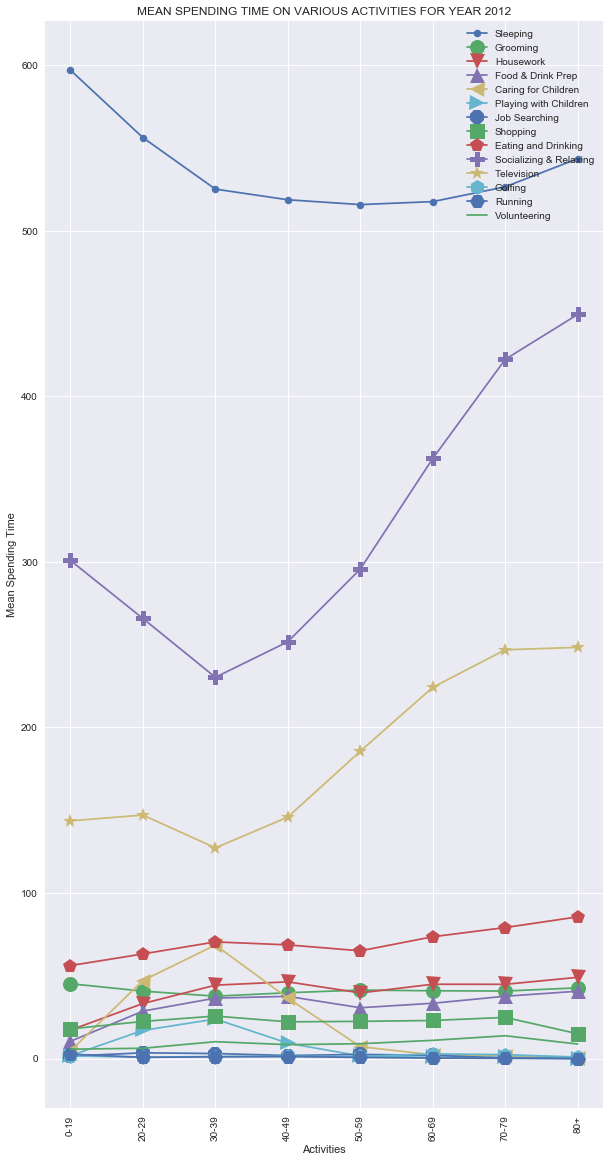

In [158]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,20))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(age_groups['Sleeping']))

for activity in activities:
    series1 = age_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, age_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

### g) Change in SPENDING TIME based on WEEKLY EARNINGS

In [159]:
df_q1.loc['Weekly Earnings Range'] = 0

In [160]:
print(df_q1['Weekly Earnings'].min())
print(df_q1['Weekly Earnings'].max())
print(df_q1['Weekly Earnings'].mean())
# df_q1.sort_values(by='Weekly Earnings', ascending=True)[0:100]
# df_q1['Weekly Earnings Range'].unique()

0
2885
499.40352411897027


In [161]:
# Creating 'Weekly Earnings Range' variable based on weekly earnings
df_q1['Weekly Earnings Range'] = pd.cut(df_q1['Weekly Earnings'], right=True, include_lowest=True, 
                                       bins=10)
# df_q1.loc[df_q1['Weekly Earnings']>2800, 'Weekly Earnings Range'] = '(2800, 2886]'

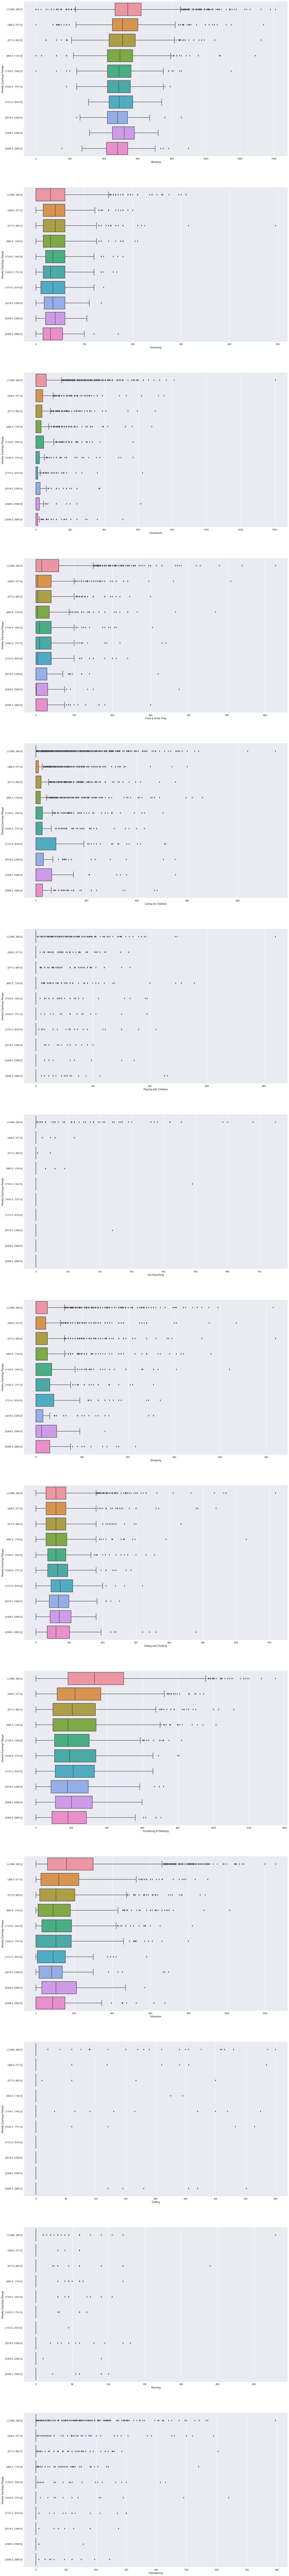

In [162]:
f, ax = plt.subplots(14, 1, figsize=(20, 200))
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
i=0
for activity in activities:
    sns.boxplot(y='Weekly Earnings Range', x=activity, data=df_q1, ax=ax[i])
#     sns.violinplot(x="Children", y=activity, data=df_2012, ax=ax[i])
    i+=1
plt.show()

In [163]:
income_groups = df_q1.groupby(by='Weekly Earnings Range').mean().loc[:,'Sleeping':'Volunteering']
income_groups
# df_q1.loc[:,'Sleeping':'Volunteering']

Sleeping   Grooming  Housework  Food & Drink Prep  \
Weekly Earnings Range                                                        
(-2.886, 288.5]        546.808641  39.278704  46.721766          38.860061   
(288.5, 577.0]         528.214859  43.530120  37.664659          28.503012   
(577.0, 865.5]         512.458797  44.167038  35.398664          26.408686   
(865.5, 1154.0]        505.397183  40.128169  35.147887          26.138028   
(1154.0, 1442.5]       494.883544  40.724051  39.860759          27.200000   
(1442.5, 1731.0]       495.104803  39.628821  34.100437          26.890830   
(1731.0, 2019.5]       498.217647  38.017647  27.247059          27.558824   
(2019.5, 2308.0]       486.381356  39.372881  31.033898          20.584746   
(2308.0, 2596.5]       520.412698  40.349206  29.158730          26.698413   
(2596.5, 2885.0]       482.000000  34.262195  27.957317          21.146341   

                       Caring for Children  Playing with Children  \
Weekly Earnings Range                                               
(-2.886, 288.5]                  23.681146               7.041794   
(288.5, 577.0]                   26.766064               8.523092   
(577.0, 865.5]                   27.888641               8.680401   
(865.5, 1154.0]                  33.812676              12.133803   
(1154.0, 1442.5]                 33.048101              10.918987   
(1442.5, 1731.0]                 33.812227              11.288210   
(1731.0, 2019.5]                 59.670588              20.488235   
(2019.5, 2308.0]                 37.093220              11.991525   
(2308.0, 2596.5]                 51.968254              19.507937   
(2596.5, 2885.0]                 33.243902              16.158537   

                       Job Searching   Shopping  Eating and Drinking  \
Weekly Earnings Range                                                  
(-2.886, 288.5]             3.652501  21.883306            69.590045   
(288.5, 577.0]              0.306225  22.122490            64.965863   
(577.0, 865.5]              0.105791  24.162584            64.069042   
(865.5, 1154.0]             0.464789  23.240845            71.060563   
(1154.0, 1442.5]            1.240506  25.951899            70.693671   
(1442.5, 1731.0]            0.000000  23.480349            75.314410   
(1731.0, 2019.5]            0.000000  29.600000            80.552941   
(2019.5, 2308.0]            2.033898  20.355932            77.186441   
(2308.0, 2596.5]            0.000000  25.555556            76.539683   
(2596.5, 2885.0]            0.000000  20.067073            78.890244   

                       Socializing & Relaxing  Television   Golfing   Running  \
Weekly Earnings Range                                                           
(-2.886, 288.5]                    352.537215  206.510448  1.333412  0.515379   
(288.5, 577.0]                     257.423695  148.286145  1.274096  0.311245   
(577.0, 865.5]                     234.989978  138.207127  0.597996  1.272829   
(865.5, 1154.0]                    233.838028  134.435211  0.661972  0.957746   
(1154.0, 1442.5]                   220.959494  130.924051  4.420253  1.531646   
(1442.5, 1731.0]                   229.768559  132.541485  4.096070  1.100437   
(1731.0, 2019.5]                   226.482353  106.347059  0.000000  0.264706   
(2019.5, 2308.0]                   211.203390  108.864407  0.000000  6.186441   
(2308.0, 2596.5]                   224.111111  139.301587  0.000000  1.587302   
(2596.5, 2885.0]                   205.493902  109.426829  8.054878  2.731707   

                       Volunteering  
Weekly Earnings Range                
(-2.886, 288.5]            9.896924  
(288.5, 577.0]             8.904618  
(577.0, 865.5]             7.317372  
(865.5, 1154.0]            8.350704  
(1154.0, 1442.5]           8.359494  
(1442.5, 1731.0]          10.371179  
(1731.0, 2019.5]          12.864706  
(2019.5, 2308.0]           9.991525  
(2308.0, 2596.5]           2.809524  
(25

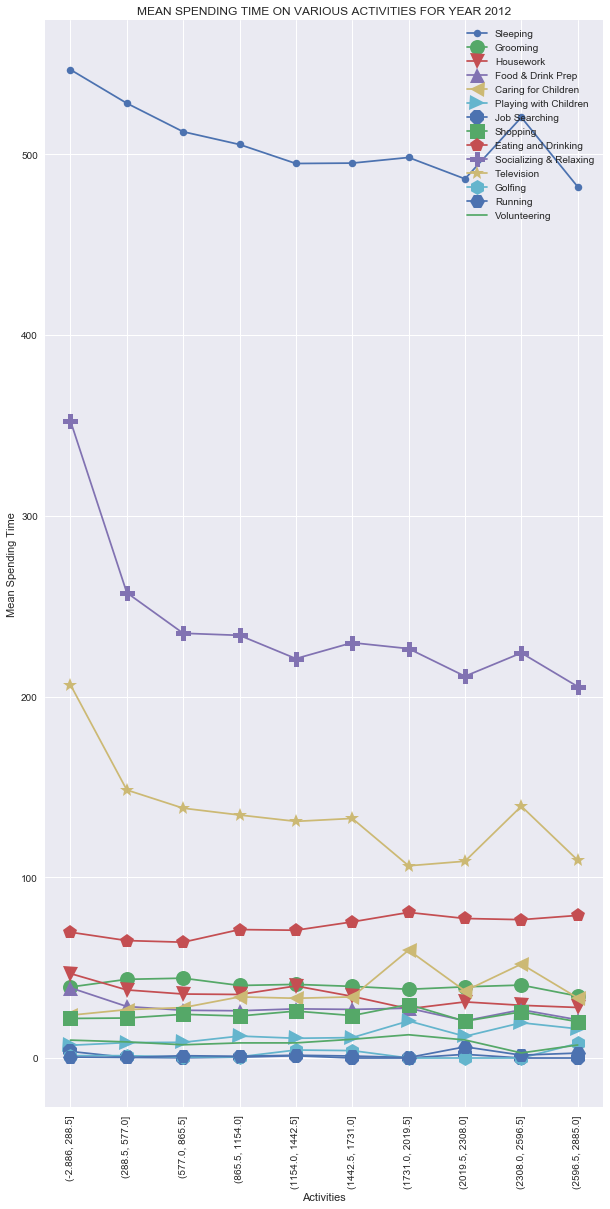

In [165]:
activities = ['Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep', 'Caring for Children', 'Playing with Children',
             'Job Searching', 'Shopping', 'Eating and Drinking', 'Socializing & Relaxing', 'Television', 'Golfing',
             'Running', 'Volunteering']
f, ax = plt.subplots(1, 1, figsize=(10,20))
i=0
marker_list = [".", "o", "v", "^", "<", ">", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|"]

xs = np.arange(len(income_groups['Sleeping']))

for activity in activities:
    series1 = income_groups[activity]
    s1mask = np.isfinite(series1)
    plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker=marker_list[i], markersize=15)
    i+=1
plt.xticks(xs, income_groups.index, rotation='vertical')
plt.xlabel('Activities')
plt.ylabel('Mean Spending Time')
plt.title('MEAN SPENDING TIME ON VARIOUS ACTIVITIES FOR YEAR 2012')
plt.legend(activities, loc='upper right')

plt.show()

## Question 3
How time spend on baby care is changing based on education, working hours, income? (consider all years). Other factors can also be considered.

### a) Change in SPENDING TIME on BABY CARE based on EDUCATION LEVEL

In [166]:
education = df_train.groupby(by='Education Level')['Caring for Children'].mean()
education

Education Level
10th grade          12.346025
11th grade          18.781967
12th grade          20.088624
9th grade           15.202885
Associate Degree    33.074836
Bachelor            42.384910
Doctoral Degree     39.208333
High School         23.009767
Master              40.762507
Prof. Degree        42.115203
Some College        27.320428
Name: Caring for Children, dtype: float64

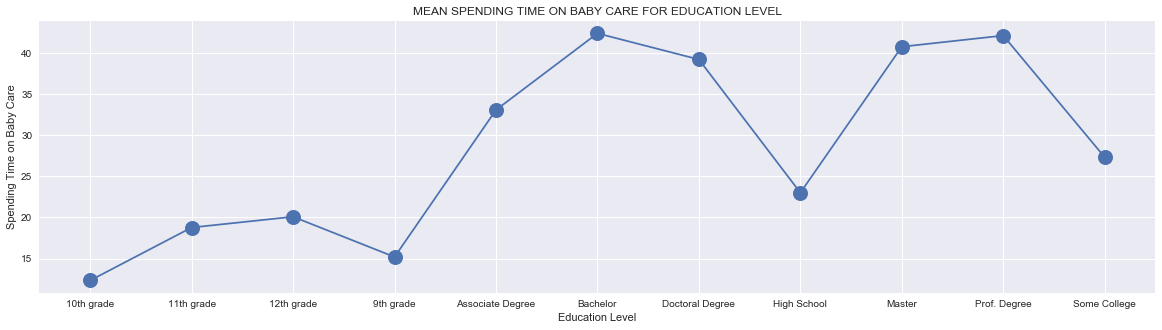

In [167]:
fig, ax = plt.subplots(figsize=(20,5))
x = range(len(education.values))
plt.plot(x, education.values, 'o-', markersize=15)
plt.xticks(x, education.index)
plt.xlabel('Education Level')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR EDUCATION LEVEL')
plt.show()

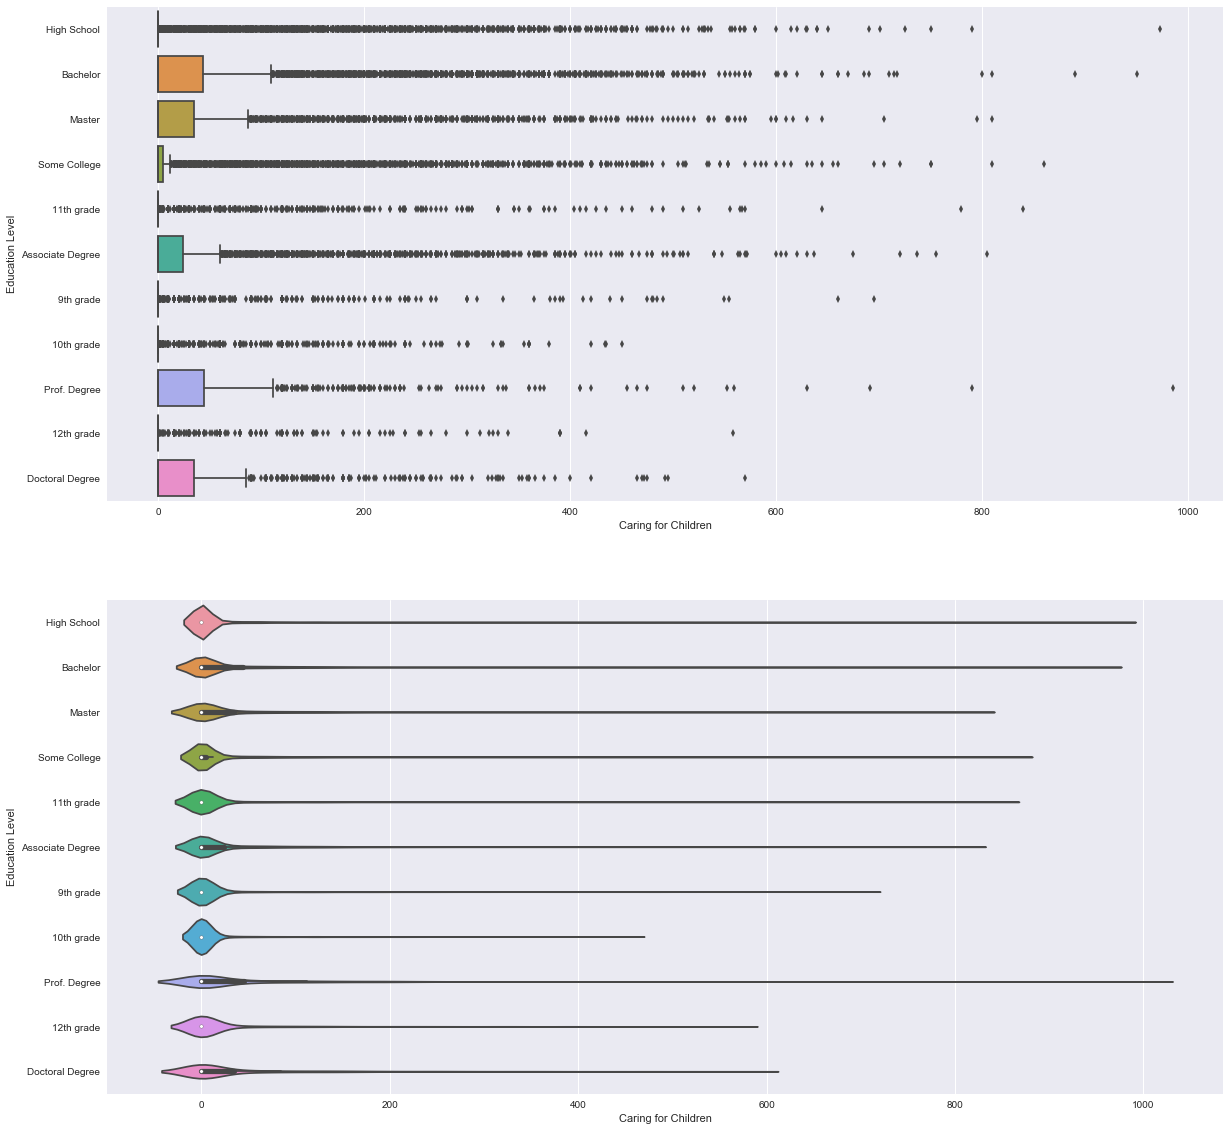

In [193]:
f, ax = plt.subplots(2, 1, figsize=(20, 20))
# activities = ['Caring for Children']

sns.boxplot(y='Education Level', x='Caring for Children', data=df_train, ax=ax[0])
sns.violinplot(y="Education Level", x='Caring for Children', data=df_train, ax=ax[1])

plt.show()

### b) Change in SPENDING TIME on BABY CARE based on WEEKLY HOURS WORKED

In [169]:
df_q3 = df_train
print(df_q3['Weekly Hours Worked'].min())
print(df_q3['Weekly Hours Worked'].max())
print(df_q3['Weekly Hours Worked'].mean())

0
160
24.50879605037028


In [170]:
# Creating 'Weekly Hours Range' variable based on weekly earnings
df_q3['Weekly Hours Range'] = pd.cut(df_q3['Weekly Hours Worked'], right=True, include_lowest=True, 
                                       bins=10)
# df_q1.loc[df_q1['Weekly Earnings']>2800, 'Weekly Earnings Range'] = '(2800, 2886]'

In [171]:
weekly_hours_groups = df_q3.groupby(by='Weekly Hours Range')['Caring for Children'].mean()
weekly_hours_groups

Weekly Hours Range
(-0.161, 16.0]    29.042152
(16.0, 32.0]      37.070705
(32.0, 48.0]      30.440716
(48.0, 64.0]      28.885195
(64.0, 80.0]      18.740435
(80.0, 96.0]      16.100000
(96.0, 112.0]     23.309859
(112.0, 128.0]     0.000000
(128.0, 144.0]          NaN
(144.0, 160.0]     0.000000
Name: Caring for Children, dtype: float64

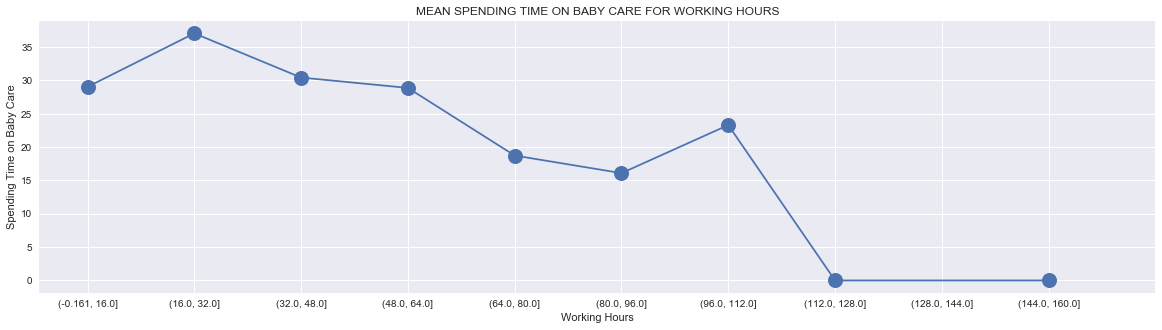

In [172]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(weekly_hours_groups.values))
series1 = weekly_hours_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(x, weekly_hours_groups.index)
plt.xlabel('Working Hours')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR WORKING HOURS')
plt.show()

### c) Change in SPENDING TIME on BABY CARE based on INCOME

In [173]:
df_q3 = df_train
print(df_q3['Weekly Earnings'].min())
print(df_q3['Weekly Earnings'].max())
print(df_q3['Weekly Earnings'].mean())

0
2885
485.69787207449303


In [174]:
# Creating 'Weekly Earnings Range' variable based on weekly earnings
df_q3['Weekly Earnings Range'] = pd.cut(df_q3['Weekly Earnings'], right=True, include_lowest=True, 
                                       bins=10)

In [175]:
weekly_earnings_groups = df_q3.groupby(by='Weekly Earnings Range')['Caring for Children'].mean()
weekly_earnings_groups

Weekly Earnings Range
(-2.886, 288.5]     28.411874
(288.5, 577.0]      28.511089
(577.0, 865.5]      29.699845
(865.5, 1154.0]     32.278514
(1154.0, 1442.5]    33.070477
(1442.5, 1731.0]    34.761219
(1731.0, 2019.5]    40.118271
(2019.5, 2308.0]    38.705645
(2308.0, 2596.5]    39.493797
(2596.5, 2885.0]    39.577894
Name: Caring for Children, dtype: float64

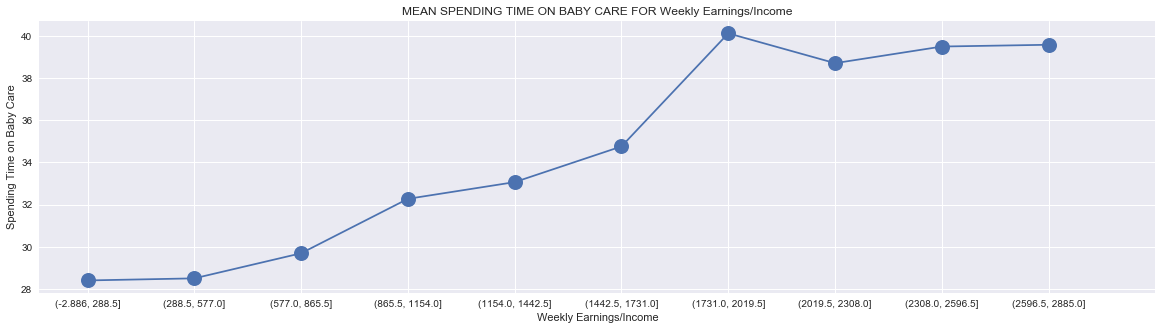

In [194]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(weekly_earnings_groups.values))
series1 = weekly_earnings_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(x, weekly_earnings_groups.index)
plt.xlabel('Weekly Earnings/Income')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR Weekly Earnings/Income')
plt.show()

### d) Change in SPENDING TIME on BABY CARE based on AGE

In [177]:
age_groups = df_q3.groupby(by='Age Range')['Caring for Children'].mean()
age_groups

Age Range
0-19      7.018877
20-29    50.177654
30-39    70.616151
40-49    35.403132
50-59     7.958472
60-69     2.860110
70-79     1.141979
80+       0.157169
Name: Caring for Children, dtype: float64

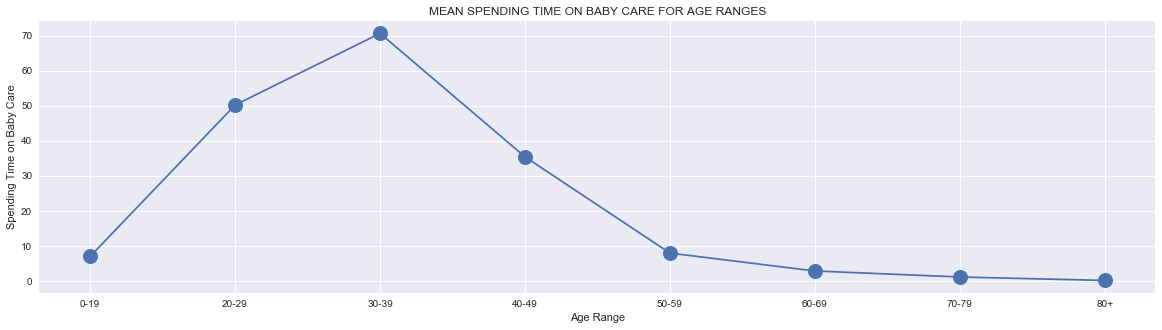

In [195]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(age_groups.values))
series1 = age_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(xs, age_groups.index)
plt.xlabel('Age Range')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR AGE RANGES')
plt.show()

### e) Change in SPENDING TIME on BABY CARE based on GENDER

In [179]:
gender_groups = df_q3.groupby(by='Gender')['Caring for Children'].mean()
gender_groups

Gender
Female    37.320298
Male      20.333895
Name: Caring for Children, dtype: float64

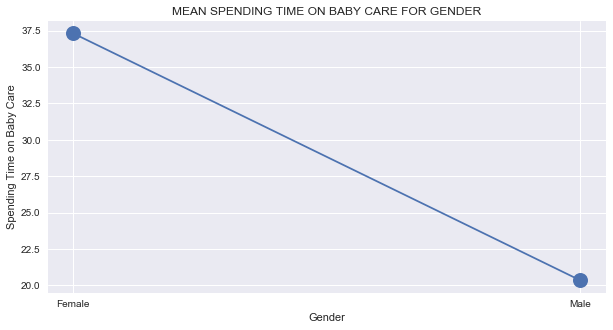

In [197]:
fig, ax = plt.subplots(figsize=(10,5))
xs = np.arange(len(gender_groups.values))
series1 = gender_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(xs, gender_groups.index)
plt.xlabel('Gender')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR GENDER')
plt.show()

### f) Change in SPENDING TIME on BABY CARE based on EMPLOYMENT STATUS

In [183]:
employment_groups = df_q3.groupby(by='Employment Status')['Caring for Children'].mean()
employment_groups

Employment Status
Employed              30.725923
Not in labor force    27.308966
Unemployed            35.507932
Name: Caring for Children, dtype: float64

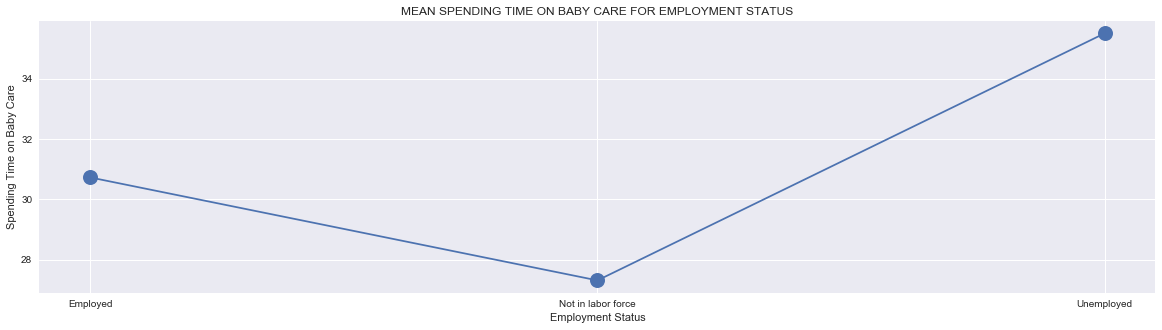

In [198]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(employment_groups.values))
series1 = employment_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(xs, employment_groups.index)
plt.xlabel('Employment Status')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR EMPLOYMENT STATUS')
plt.show()

### g) Change in SPENDING TIME on BABY CARE based on number of CHILDREN

In [186]:
children_groups = df_q3.groupby(by='Children')['Caring for Children'].mean()
children_groups

Children
0       0.001787
1      46.714229
2      70.696661
3      78.805625
4      89.441718
5      73.418675
6     100.537037
7      69.620690
8      68.500000
9     181.666667
10     94.000000
11      0.000000
12     60.000000
Name: Caring for Children, dtype: float64

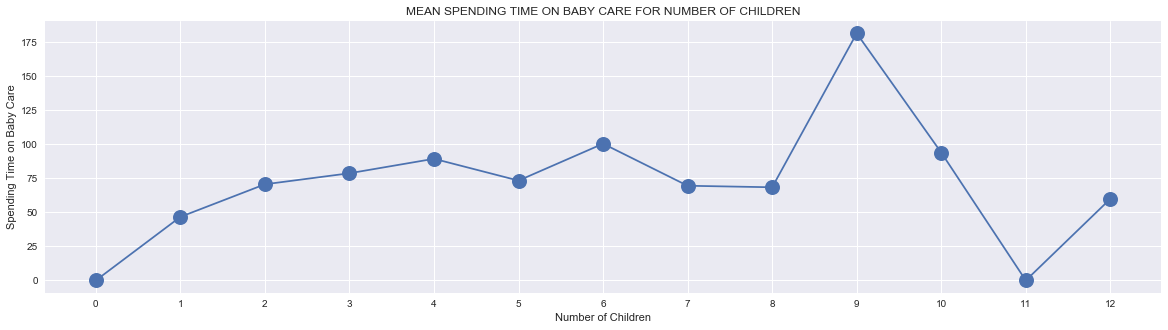

In [191]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(children_groups.values))
series1 = children_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(xs, children_groups.index)
plt.xlabel('Number of Children')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR NUMBER OF CHILDREN')
plt.show()

### h) Change in SPENDING TIME on BABY CARE based on YEAR

In [188]:
year_groups = df_q3.groupby(by='Year')['Caring for Children'].mean()
year_groups

Year
2005    31.445306
2006    31.134358
2007    31.003250
2008    29.560180
2009    30.373328
2010    30.764904
2011    27.529059
2012    27.573053
Name: Caring for Children, dtype: float64

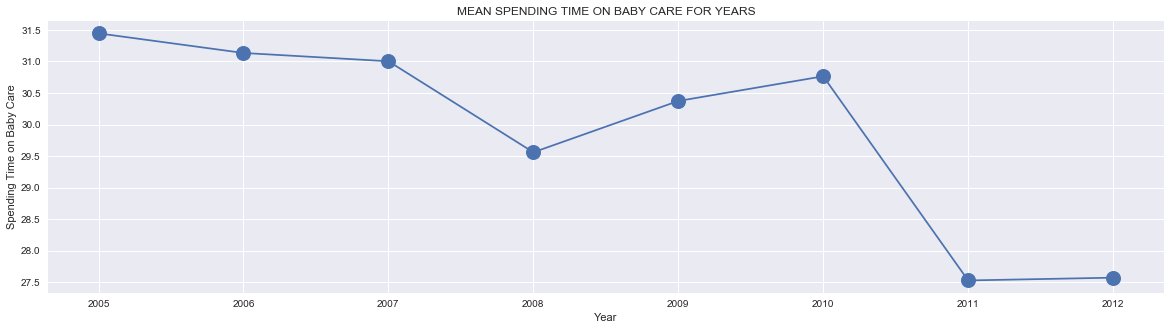

In [192]:
fig, ax = plt.subplots(figsize=(20,5))
xs = np.arange(len(year_groups.values))
series1 = year_groups.values
s1mask = np.isfinite(series1)
plt.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', markersize=15)
plt.xticks(xs, year_groups.index)
plt.xlabel('Year')
plt.ylabel('Spending Time on Baby Care')
plt.title('MEAN SPENDING TIME ON BABY CARE FOR YEARS')
plt.show()

Discretizing WEEKLY HOURS WORKED into new variable WEEKLY HOURS RANGE

In [ ]:
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>=0) & (df_train_q3['Weekly Hours Worked']<=10), 'Weekly Hours Range'] = '0-10'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>10) & (df_train_q3['Weekly Hours Worked']<=20), 'Weekly Hours Range'] = '10-20'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>20) & (df_train_q3['Weekly Hours Worked']<=30), 'Weekly Hours Range'] = '20-30'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>30) & (df_train_q3['Weekly Hours Worked']<=40), 'Weekly Hours Range'] = '30-40'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>40) & (df_train_q3['Weekly Hours Worked']<=50), 'Weekly Hours Range'] = '40-50'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>50) & (df_train_q3['Weekly Hours Worked']<=60), 'Weekly Hours Range'] = '50-60'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>60) & (df_train_q3['Weekly Hours Worked']<=70), 'Weekly Hours Range'] = '60-70'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>70) & (df_train_q3['Weekly Hours Worked']<=80), 'Weekly Hours Range'] = '70-80'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>80) & (df_train_q3['Weekly Hours Worked']<=90), 'Weekly Hours Range'] = '80-90'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>90) & (df_train_q3['Weekly Hours Worked']<=100), 'Weekly Hours Range'] = '90-100'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>100) & (df_train_q3['Weekly Hours Worked']<=110), 'Weekly Hours Range'] = '100-110'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>110) & (df_train_q3['Weekly Hours Worked']<=120), 'Weekly Hours Range'] = '110-120'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>120) & (df_train_q3['Weekly Hours Worked']<=130), 'Weekly Hours Range'] = '120-130'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>130) & (df_train_q3['Weekly Hours Worked']<=140), 'Weekly Hours Range'] = '130-140'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>140) & (df_train_q3['Weekly Hours Worked']<=150), 'Weekly Hours Range'] = '140-150'
df_train_q3.loc[(df_train_q3['Weekly Hours Worked']>150) & (df_train_q3['Weekly Hours Worked']<=160), 'Weekly Hours Range'] = '150-160'


### a) Change in SPENDING TIME on BABY CARE based on number of WORKING HOURS

In [ ]:
f, ax = plt.subplots(2, 1, figsize=(20, 20))
activities = ['Caring for Children']

sns.boxplot(y='Weekly Hours Range', x=activity, data=df_train, ax=ax[0])
sns.violinplot(y="Weekly Hours Range", x=activity, data=df_train, ax=ax[1])

plt.show()

In [ ]:
df_q3.head()